# **고객 세분화를 위한 RFM · Cohort 분석**  
**┗ 고객 가치 평가 및 CRM 전략 제안**
---

>  📌 본 프로젝트는 **제로베이스스쿨 개인 프로젝트**의 일환으로 진행되었습니다.
---
> ### **목차(Context)**
✔ Project Summary <br>
✔ Process 01 - EDA <br>
✔ Process 02 - RFM 지표 정의 <br>
✔ Process 03 - RFM 등급화 <br>
✔ Process 04 - K-means 기반 군집 세분화 <br>
✔ Process 05 - 지표기획 & Cohort 분석 <br>
✔ Process 06 - 인사이트 및 전략 도출 <br>



### **📖  Project Summary**
---

> **프로젝트명**

```
▶ 고객 Segmentation을 위한 RFM·Cohort 분석
```  

> **프로젝트유형**

```
▶ 데이터 EDA · 고객 세분화 (Segmentation) · 인사이트 도출
```

> **학습목표**

```
▶ 고객 데이터를 전처리·탐색(EDA)하고 지표를 정의하는 역량 습득
▶ RFM 기반 고객 Segmentation 개념과 K-means 군집화 적용 경험
▶ Cohort 분석을 통해 고객 잔존율(리텐션) 패턴을 파악하는 역량 습득
▶ 분석 결과를 비즈니스 전략 제안으로 연결하는 실전형 분석 능력 강화
```

## **📖 문제상황 Introduction**
---

> **시나리오**  

```
A사는 글로벌 오픈마켓 플랫폼을 운영한다.  
런칭 초기에는 고객 수가 빠르게 증가했지만, 이후 서비스 이용이 정체·감소세를 보이며  
영업이익과 고객 유지율에 리스크가 발생하고 있다.

```  

> **문제정의**

```
▶ 고객 이용 수준 및 매출 기여도의 불균형 구조 파악 필요
▶ 특정 소수 VIP 고객에 과도하게 의존하는 위험 구조 확인
▶ 신규/저관여 고객 이탈률이 높아 장기 성장성 저해
```  

> **해결방안**

```
▶ 거래 데이터를 기반으로 RFM 지표 정의 (Recency·Frequency·Monetary)
▶ Rule-based 등급화 vs K-means 클러스터링 비교 분석
▶ Cohort 분석을 통한 고객 잔존율·재구매 패턴 탐색
▶ 세분화 결과 기반 맞춤형 CRM/마케팅 전략 제안
```

> **성과측정**  

```
▶ RFM Score 기반 고객 충성도·매출 기여도 분석
▶ K-means 군집 결과로 Normal 그룹의 세부 행동 특성 발견
▶ Cohort 분석을 통한 초기 이탈·재활성화 패턴 시각화
```

> **기대효과**

```
▶ 충성 고객 리텐션 강화 → 핵심 매출 유지
▶ 신규/저관여 고객의 재구매·활성화 전략 도출 → 모수 확대
▶ 휴면/이탈 고객 관리 효율화 → 비용 최적화
```

> **데이터 살펴보기**

* 이커머스 온라인 구매 데이터
* 데이터 명세 ⬇

|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|송장번호|재고코드|상세설명|수량|송장날짜|개당가격|고객ID|나라|




## **Import**

In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# 스타일 초기화
plt.style.use("default")
sns.set_style("whitegrid")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)


In [ ]:
# Data read
df=pd.read_csv('./data/S_PJT06_DATA_rfm.csv', encoding='ISO-8859-1')
df.head()

## **🔈Process01 - EDA**
---

### 🔶 데이터 탐색(EDA)
---
- 데이터 기본 확인
- 데이터 전처리
- 이상치 탐색
- 데이터 요약


#### · 데이터 기본 확인
- 데이터 크기, 결측치, 기초 통계량 확인

In [ ]:
# Data 형태 확인
df.shape

(541909, 8)

In [ ]:
# 데이터 샘플 확인
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# 데이터 크기 및 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Null 값 확인
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# 기초 통계량 : Quantity와 UnitPrice에 음수가 존재 → Outlier 가능성 높음
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### · 데이터 전처리
- CustomerID 결측 제거
- Quantity, UnitPrice 음수 제거

In [ ]:
# CustomerID null 제거

df.dropna(subset=['CustomerID'], how='all', inplace=True)
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# UnitPrice 음수 제거
df = df[df['UnitPrice'] > 0]

# Quantity 음수 제거
df = df[df['Quantity'] > 0]

# 전처리 후 데이터 크기 확인
print('df', df.shape)


df (397884, 8)


#### · 이상치 탐색
- `Quantity`, `UnitPrice` 분포 시각화 결과, 일부 극단적 고값·대량 구매가 확인됨  
- 단순한 오류값이 아니라 **VIP·B2B 고객일 가능성이 높은 실제 패턴**으로 판단하여 제거하지 않음  
- 다만, 분포 왜곡을 보완하기 위해 **원본 분포 + 99% 컷 시각화**를 병행하여 분석  

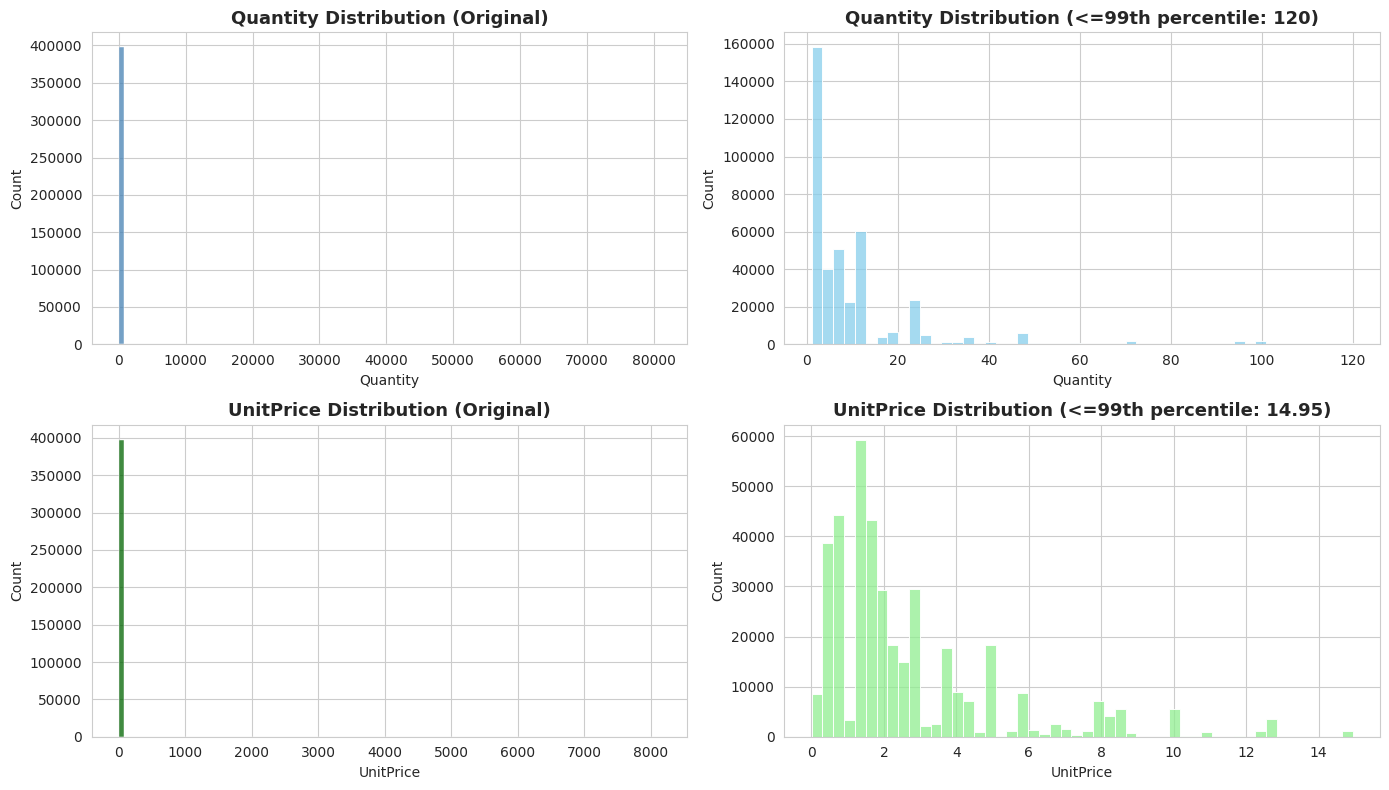

In [ ]:
# Quantity & UnitPrice 분포 확인 (원본 vs 99th percentile 컷)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

## Quantity 원본 분포
sns.histplot(df['Quantity'], bins=100, kde=False, ax=axes[0,0], color="steelblue")
axes[0,0].set_title("Quantity Distribution (Original)", fontsize=13, fontweight='bold')

## Quantity (상위 1% 컷)
q99_qty = df['Quantity'].quantile(0.99)
sns.histplot(df[df['Quantity'] <= q99_qty]['Quantity'], bins=50, kde=False, ax=axes[0,1], color="skyblue")
axes[0,1].set_title(f"Quantity Distribution (<=99th percentile: {int(q99_qty)})", fontsize=13, fontweight='bold')

## UnitPrice 원본 분포
sns.histplot(df['UnitPrice'], bins=100, kde=False, ax=axes[1,0], color="darkgreen")
axes[1,0].set_title("UnitPrice Distribution (Original)", fontsize=13, fontweight='bold')

## UnitPrice (상위 1% 컷)
q99_price = df['UnitPrice'].quantile(0.99)
sns.histplot(df[df['UnitPrice'] <= q99_price]['UnitPrice'], bins=50, kde=False, ax=axes[1,1], color="lightgreen")
axes[1,1].set_title(f"UnitPrice Distribution (<=99th percentile: {q99_price:.2f})", fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


# 인사이트:
# - 원본 분포: 극단적 거래값(대량 주문·고가 상품)으로 인해 대부분 값이 0 근처에 몰려 보임
# - 99th 컷 분포: 실제 다수 고객은 소량·저가 구매 패턴이 주를 이룸
# - 극단값은 오류라기보다는 VIP·B2B 거래일 가능성 → 제거하지 않고 별도 관리 대상으로 구분


#### · 데이터 요약
- 고객 수, 주문 건수, 총 구매량, 국가 수, 평균 주문 건수

In [ ]:
# 데이터 개요

n_customers = df['CustomerID'].nunique()
n_orders = df['InvoiceNo'].nunique()
total_quantity = df['Quantity'].sum()
n_countries = df['Country'].nunique()


print(f"이용 고객 수: {n_customers:,}")
print(f"총 주문 건수(InvoiceNo 기준): {n_orders:,}")
print(f"총 구매 수량: {total_quantity:,}")
print(f"이용 국가 수: {n_countries}")

# 고객 1인당 평균 주문 건수
avg_orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().mean()
print(f"고객 1인당 평균 주문 건수: {avg_orders_per_customer:.2f}")

이용 고객 수: 4,338
총 주문 건수(InvoiceNo 기준): 18,532
총 구매 수량: 5,167,812
이용 국가 수: 37
고객 1인당 평균 주문 건수: 4.27


## **🔉Process02 - RFM 지표 정의**  

---

▶︎ KPI 정의

- 고객 수: CustomerID 기준 unique count
- 주문 수: InvoiceNo 기준 unique count
- 매출액: UnitPrice × Quantity 합계
- RFM 지표: 고객 가치 평가를 위한 3가지 핵심 지표

| 항목        | 정의                           |
| --------- | ---------------------------- |
| Recency   | 최근에 구매한 지 얼마나 되었나? (작을수록 최근) |
| Frequency | 얼마나 자주 구매했나? (구매 횟수)         |
| Monetary  | 총 얼마나 돈을 썼나? (총 구매 금액)       |



### 🔶 Recency(최근성)
---

### ▶ Recency 인사이트
- Recency(최근성)는 값이 작을수록 긍정적 의미 → 최근에 구매한 고객일수록 충성도가 높음
- 고객 분포는 양극화:

  - 전체 고객 중 38%는 최근 30일 이내 구매
  - 반면 24%는 150일 이상 미구매 상태

- Gini 계수 0.563 → “소수 고객만 최근에 활발히 구매, 다수 고객은 장기간 미구매” 구조 확인
- 따라서 휴면 고객 재활성화와 충성 고객 관리 전략이 병행되어야 함

※ Lorenz Curve 해석 유의:
Recency는 “작을수록 긍정적” 지표이므로, 곡선은 ‘최근성 집중도’를 의미하며
Frequency, Monetary와는 해석 방향이 다름.

In [ ]:
# -- Recency 분석: 고객이 마지막으로 구매한 이후 며칠이 지났는지 계산 --

# 고객별 마지막 구매일 → 기준일 대비 Recency 계산
df['Date'] = pd.to_datetime(df['InvoiceDate'].str.split(' ').str[0])
recency_df = df.groupby('CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']   # 컬럼명 정리
recency_df['Recency'] = (df['Date'].max() - recency_df['LastPurchaseDate']).dt.days
recency_df.drop(columns=['LastPurchaseDate'], inplace=True)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [ ]:
# 기초 통계 확인
display(recency_df['Recency'].describe(percentiles=[.25, .5, .75, .9, .95, .99]))

,Recency
count,4338.000000
mean,92.059474
std,100.012264
min,0.000000
25%,17.000000
50%,50.000000
75%,141.750000
90%,262.300000
95%,311.000000
99%,368.630000


In [ ]:
# 고객을 Recency 기준으로 정렬 → 작은 Recency = 최근에 구매한 고객
recency_sorted = recency_df.sort_values(by='Recency', ascending=True).reset_index(drop=True)

# 누적 고객 비율 & 누적 “신선도” 기여도
recency_sorted['CumCustomerRatio'] = (np.arange(1, len(recency_sorted)+1)) / len(recency_sorted)
recency_sorted['CumFreshness'] = recency_sorted['Recency'].cumsum() / recency_sorted['Recency'].sum()

# 상위 그룹별 기여도
top10 = recency_sorted.loc[recency_sorted['CumCustomerRatio'] <= 0.1, 'Recency'].sum() / recency_sorted['Recency'].sum()
top20 = recency_sorted.loc[recency_sorted['CumCustomerRatio'] <= 0.2, 'Recency'].sum() / recency_sorted['Recency'].sum()
top50 = recency_sorted.loc[recency_sorted['CumCustomerRatio'] <= 0.5, 'Recency'].sum() / recency_sorted['Recency'].sum()

print("상위 10% 고객 최신성 기여도:", round(top10*100, 1), "%")
print("상위 20% 고객 최신성 기여도:", round(top20*100, 1), "%")
print("상위 50% 고객 최신성 기여도:", round(top50*100, 1), "%")


상위 10% 고객 최신성 기여도: 0.3 %
상위 20% 고객 최신성 기여도: 1.2 %
상위 50% 고객 최신성 기여도: 10.5 %


In [ ]:
# 유틸 함수 정의
def gini_coefficient(x):
    """
    Gini coefficient 계산
    x: 1차원 numpy array 또는 pandas Series (음수 없는 값)
    """
    x = np.sort(x)              # 오름차순 정렬
    n = len(x)
    cumx = np.cumsum(x)          # 누적 합
    gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    return gini

Gini 계수 (Recency): 0.563


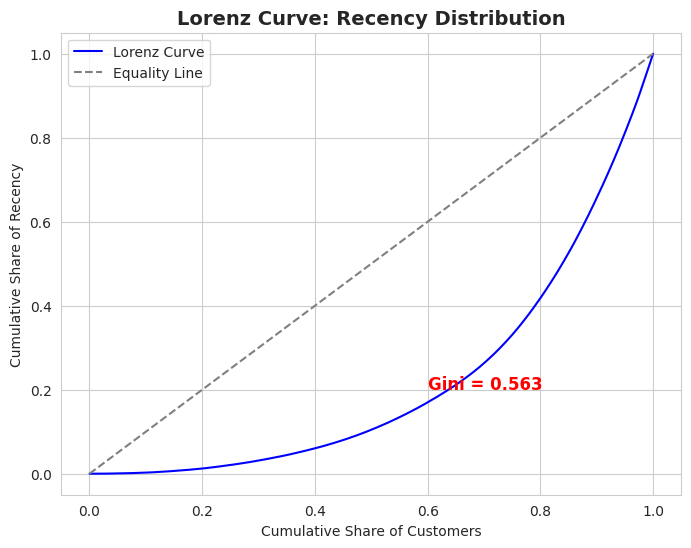

In [ ]:
# Gini 계수
gini_recency = gini_coefficient(recency_df['Recency'].values)
print(f"Gini 계수 (Recency): {gini_recency:.3f}")

# Lorenz Curve 시각화
plt.figure(figsize=(8,6))
plt.plot(recency_sorted['CumCustomerRatio'], recency_sorted['CumFreshness'],
         label='Lorenz Curve', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Equality Line')
plt.title("Lorenz Curve: Recency Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Cumulative Share of Customers")
plt.ylabel("Cumulative Share of Recency")
plt.text(0.6, 0.2, f"Gini = {gini_recency:.3f}", fontsize=12, color="red", fontweight="bold")
plt.legend()
plt.show()


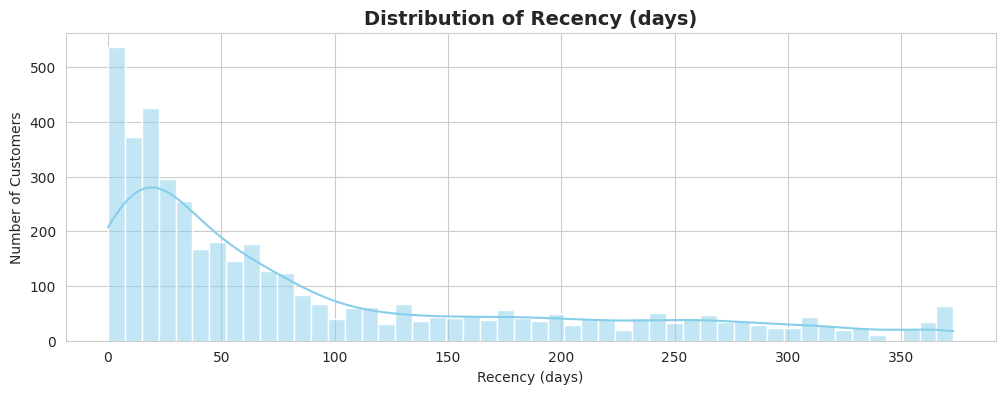

/tmp/ipython-input-3783324667.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recency_share.index, y=recency_share.values, palette="Blues_d")


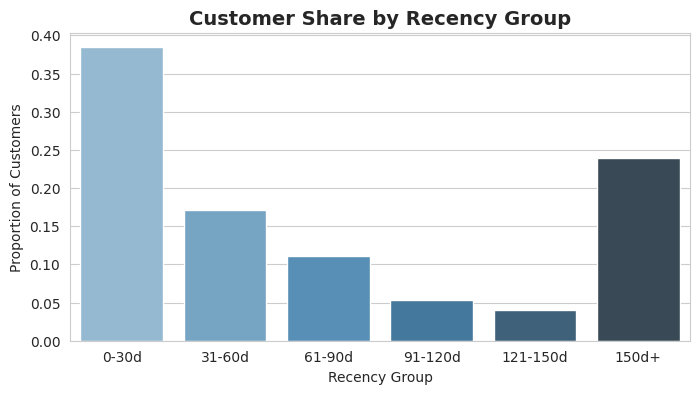

,RecencyGroup,Percent
0,0-30d,38.4
1,31-60d,17.1
2,61-90d,11.0
3,91-120d,5.4
4,121-150d,4.1
5,150d+,24.0


In [ ]:
# Recency 분포 히스토그램
plt.figure(figsize=(12,4))
sns.histplot(recency_df['Recency'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Recency (days)", fontsize=14, fontweight='bold')
plt.xlabel("Recency (days)")
plt.ylabel("Number of Customers")
plt.show()

# Recency 구간별 고객 비율
bins = [0, 30, 60, 90, 120, 150, recency_df['Recency'].max()]
labels = ['0-30d','31-60d','61-90d','91-120d','121-150d','150d+']
recency_df['RecencyGroup'] = pd.cut(
    recency_df['Recency'], bins=bins, labels=labels, include_lowest=True
)

# 구간별 비율
recency_share = recency_df['RecencyGroup'].value_counts(normalize=True).sort_index()
recency_table = (recency_share * 100).round(1).reset_index()
recency_table.columns = ['RecencyGroup','Percent']

# 시각화 (막대그래프)
plt.figure(figsize=(8,4))
sns.barplot(x=recency_share.index, y=recency_share.values, palette="Blues_d")
plt.title("Customer Share by Recency Group", fontsize=14, fontweight='bold')
plt.ylabel("Proportion of Customers")
plt.xlabel("Recency Group")
plt.show()

# 표 출력
display(recency_table)


### 🔶 Frequency(최빈성)
---
### ▶ Frequency 인사이트
- 고객의 구매 횟수는 대부분 1~3회에 집중 → 일회성 고객이 다수
- 상위 20% 고객이 전체 주문의 59.6% 를 기여 → 반복 구매 고객이 핵심
- Gini 계수 0.541 → 구매 빈도 분포가 불균형 (충성 고객 소수에게 쏠림)
- 전략적으로 충성 고객 유지 관리와 동시에 저빈도 고객의 재구매 유도가 필요

In [ ]:
# -- Frequency 분석: 고객별 구매 횟수 (주문 단위) --

# 주문 단위 데이터 확보 (CustomerID + InvoiceNo 중복 제거)
frequency_df = df.drop_duplicates(subset=['CustomerID','InvoiceNo'])

# 고객별 주문 건수 집계
frequency_df = frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()




,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
# 기초 통계 확인
display(frequency_df['Frequency'].describe(percentiles=[.25, .5, .75, .9, .95, .99]))

,Frequency
count,4338.000000
mean,4.272015
std,7.697998
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
90%,9.000000
95%,13.000000
99%,30.000000


In [ ]:
print('frequency_df', df.shape)

frequency_df (397884, 9)


In [ ]:
# 고객을 구매횟수 기준으로 내림차순 정렬
freq_sorted = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# 누적 고객 비율 & 누적 주문 비율
freq_sorted['CumCustomerRatio'] = (np.arange(1, len(freq_sorted)+1)) / len(freq_sorted)
freq_sorted['CumOrderRatio'] = freq_sorted['Frequency'].cumsum() / freq_sorted['Frequency'].sum()

# 그룹별 기여도
top10_f = freq_sorted.loc[freq_sorted['CumCustomerRatio'] <= 0.1, 'Frequency'].sum() / freq_sorted['Frequency'].sum()
top20_f = freq_sorted.loc[freq_sorted['CumCustomerRatio'] <= 0.2, 'Frequency'].sum() / freq_sorted['Frequency'].sum()
top50_f = freq_sorted.loc[freq_sorted['CumCustomerRatio'] <= 0.5, 'Frequency'].sum() / freq_sorted['Frequency'].sum()

print("상위 10% 고객 주문 기여도:", round(top10_f*100, 1), "%")
print("상위 20% 고객 주문 기여도:", round(top20_f*100, 1), "%")
print("상위 50% 고객 주문 기여도:", round(top50_f*100, 1), "%")

상위 10% 고객 주문 기여도: 43.3 %
상위 20% 고객 주문 기여도: 59.6 %
상위 50% 고객 주문 기여도: 84.6 %


Gini 계수 (Frequency): 0.541


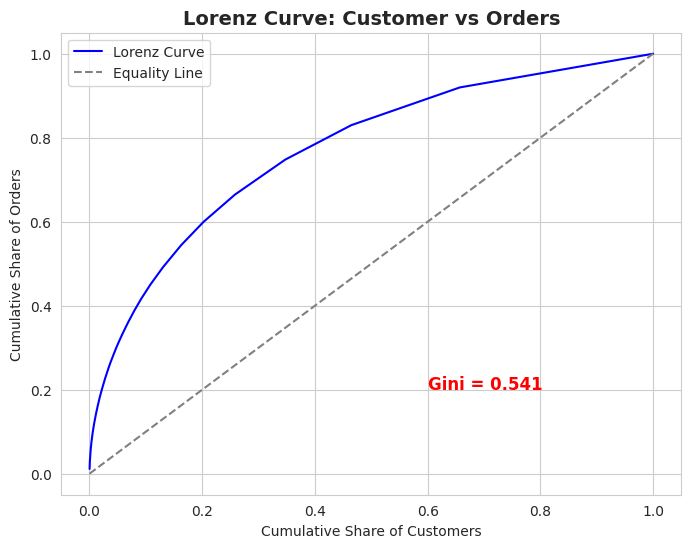

In [ ]:
# Gini 계수
gini_frequency = gini_coefficient(frequency_df['Frequency'].values)
print(f"Gini 계수 (Frequency): {gini_frequency:.3f}")


# Lorenz Curve 시각화
plt.figure(figsize=(8,6))
plt.plot(freq_sorted['CumCustomerRatio'], freq_sorted['CumOrderRatio'],
         label='Lorenz Curve', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Equality Line')

plt.title("Lorenz Curve: Customer vs Orders", fontsize=14, fontweight='bold')
plt.xlabel("Cumulative Share of Customers")
plt.ylabel("Cumulative Share of Orders")

# 지니계수 텍스트 추가
plt.text(0.6, 0.2, f"Gini = {gini_frequency:.3f}", fontsize=12, color="red", fontweight="bold")

plt.legend()
plt.show()

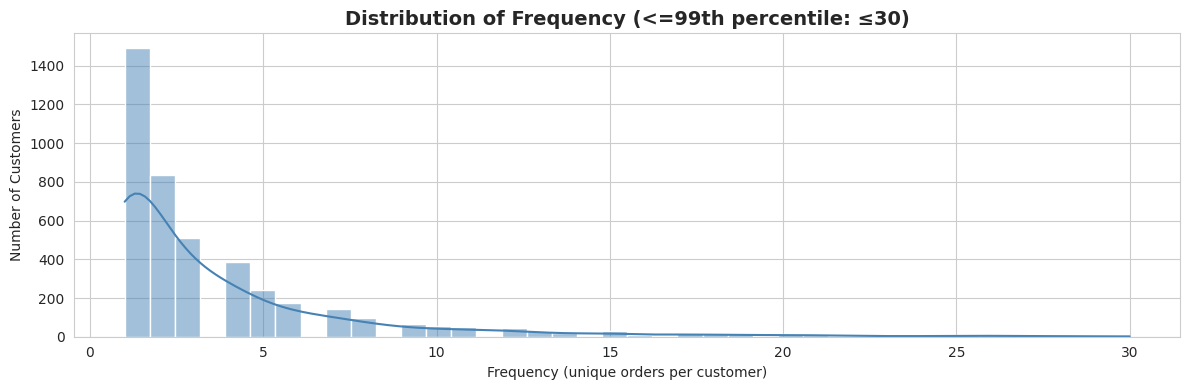

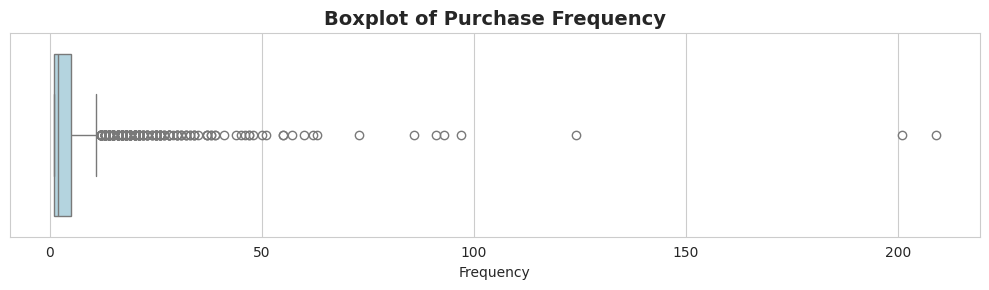

In [ ]:
# 히스토그램 (상위 1% 컷 적용)
freq_q99 = frequency_df['Frequency'].quantile(0.99)
plt.figure(figsize=(12,4))
sns.histplot(
    data=frequency_df[frequency_df['Frequency'] <= freq_q99],
    x='Frequency', bins=40, kde=True, color='steelblue'
)
plt.title(f"Distribution of Frequency (<=99th percentile: ≤{int(freq_q99)})",
          fontsize=14, fontweight='bold')
plt.xlabel("Frequency (unique orders per customer)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

# 박스플롯
plt.figure(figsize=(10,3))
sns.boxplot(data=frequency_df, x='Frequency', color='lightblue')
plt.title("Boxplot of Purchase Frequency", fontsize=14, fontweight='bold')
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


### 🔶 Monetary(금액)
---

### ▶ Monetary 인사이트
- 고객 지출액은 전형적인 long-tail 분포를 보임 (대다수는 소액, 일부 고객은 고액 지출)
- 상위 20% 고객이 약 75%의 매출을 기여 → 매출 구조가 소수 고객에 의존
- Gini 계수 0.715 → 매출 분포 불균등성이 매우 높음
- 따라서 VIP 고객 집중 관리 전략과 함께, 롱테일 고객 활성화 전략 병행 필요

In [ ]:
# -- Monetary 분석: 고객별 총 구매금액 --

# 1) 고객별 총 구매 금액 산출
df['Total_cost'] = df['UnitPrice'] * df['Quantity']
monetary_df = df.groupby('CustomerID', as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']

# 2) 기초 통계 확인
display(monetary_df['Monetary'].describe(percentiles=[.25, .5, .75, .9, .95, .99]))


,Monetary
count,4338.000000
mean,2054.266460
std,8989.230441
min,3.750000
25%,307.415000
50%,674.485000
75%,1661.740000
90%,3646.531000
95%,5841.843000
99%,19880.995700


In [ ]:
monetary_df.shape

(4338, 2)

In [ ]:
# 고객을 지출액 기준으로 정렬
monetary_sorted = monetary_df.sort_values(by='Monetary', ascending=False).reset_index(drop=True)

# 누적 고객 비율 & 매출 비율 계산
monetary_sorted['CumCustomerRatio'] = (np.arange(1, len(monetary_sorted)+1)) / len(monetary_sorted)
monetary_sorted['CumSalesRatio'] = monetary_sorted['Monetary'].cumsum() / monetary_sorted['Monetary'].sum()

# 그룹별 비중 확인
top10 = monetary_sorted.loc[monetary_sorted['CumCustomerRatio'] <= 0.1, 'Monetary'].sum() / monetary_sorted['Monetary'].sum()
top20 = monetary_sorted.loc[monetary_sorted['CumCustomerRatio'] <= 0.2, 'Monetary'].sum() / monetary_sorted['Monetary'].sum()
top50 = monetary_sorted.loc[monetary_sorted['CumCustomerRatio'] <= 0.5, 'Monetary'].sum() / monetary_sorted['Monetary'].sum()

print("상위 10% 고객 매출 기여도:", round(top10*100, 1), "%")
print("상위 20% 고객 매출 기여도:", round(top20*100, 1), "%")
print("상위 50% 고객 매출 기여도:", round(top50*100, 1), "%")


상위 10% 고객 매출 기여도: 61.3 %
상위 20% 고객 매출 기여도: 74.6 %
상위 50% 고객 매출 기여도: 92.2 %


Gini 계수: 0.715


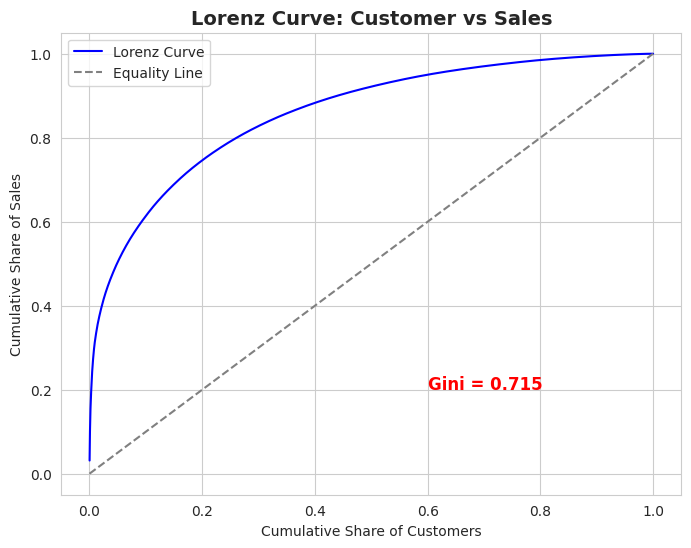

In [ ]:
# Gini 계수
gini_monetary = gini_coefficient(monetary_df['Monetary'].values)
print(f"Gini 계수: {gini_monetary:.3f}")

# Lorenz Curve 시각화 (지니계수 표시 추가)
plt.figure(figsize=(8,6))
plt.plot(monetary_sorted['CumCustomerRatio'], monetary_sorted['CumSalesRatio'],
         label='Lorenz Curve', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Equality Line')

plt.title("Lorenz Curve: Customer vs Sales", fontsize=14, fontweight='bold')
plt.xlabel("Cumulative Share of Customers")
plt.ylabel("Cumulative Share of Sales")

# 지니계수 텍스트 추가
plt.text(0.6, 0.2, f"Gini = {gini_monetary:.3f}", fontsize=12, color="red", fontweight="bold")

plt.legend()
plt.show()


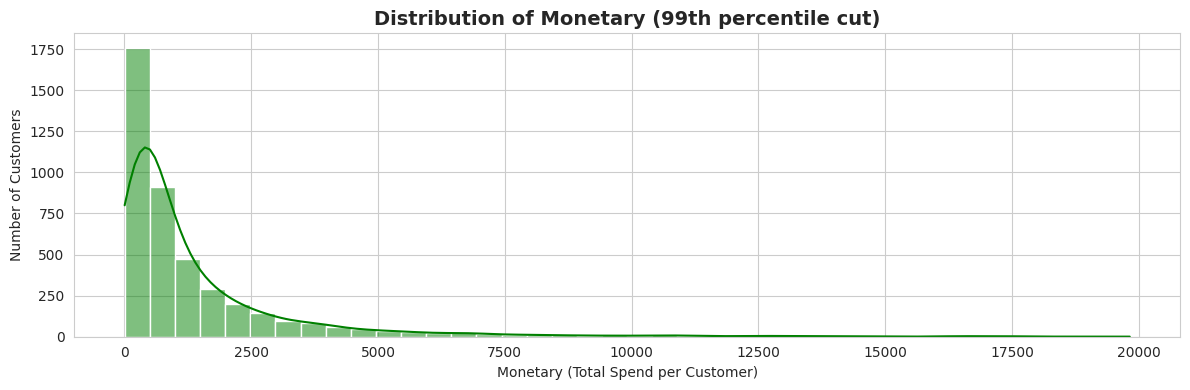

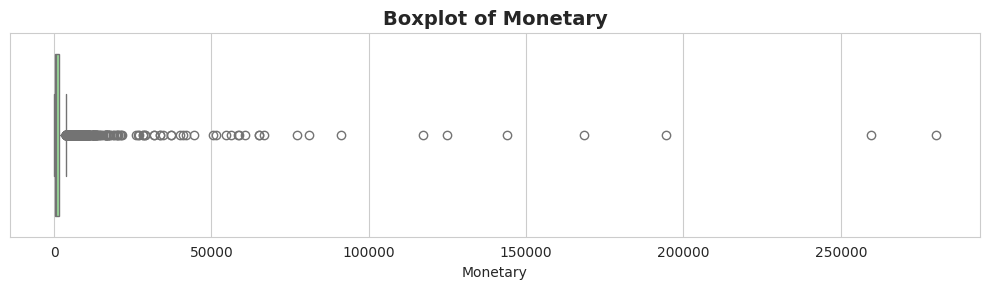

In [ ]:
# 히스토그램 (상위 1% 컷 적용)
mon_q99 = monetary_df['Monetary'].quantile(0.99)
plt.figure(figsize=(12,4))
sns.histplot(
    data=monetary_df[monetary_df['Monetary'] <= mon_q99],
    x='Monetary', bins=40, kde=True, color='green'
)
plt.title("Distribution of Monetary (99th percentile cut)", fontsize=14, fontweight='bold')
plt.xlabel("Monetary (Total Spend per Customer)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

# 박스플롯
plt.figure(figsize=(10,3))
sns.boxplot(data=monetary_df, x='Monetary', color='lightgreen')
plt.title("Boxplot of Monetary", fontsize=14, fontweight='bold')
plt.xlabel("Monetary")
plt.tight_layout()
plt.show()


In [ ]:
# RFM 데이터셋 통합

# Recency + Frequency
rf = recency_df.merge(frequency_df, how='left', on='CustomerID')

# RFM 최종 병합
rfm = rf.merge(monetary_df, how='left', on='CustomerID')

rfm.head()

,CustomerID,Recency,RecencyGroup,Frequency,Monetary
0,12346.0,325,150d+,1,77183.60
1,12347.0,2,0-30d,7,4310.00
2,12348.0,75,61-90d,4,1797.24
3,12349.0,18,0-30d,1,1757.55
4,12350.0,310,150d+,1,334.40


### 🔶 CRM Matrix (Recency × Monetary)
---
### ▶ CRM Matrix 인사이트
- Recency(최근성)와 Monetary(지출액)를 결합해 고객을 **4개 전략군**으로 분류 가능  
- **VIP Customers (Recent + High-Spend)**: 최근 활발히 구매하며 지출도 큰 핵심 고객 → 유지·리워드 프로그램 강화 필요  
- **At-Risk Customers (Old + High-Spend)**: 과거 지출은 컸지만 최근 구매 없음 → 재활성화 캠페인 우선 대상  
- **Potential Growth (Recent + Low-Spend)**: 최근 구매는 있으나 지출이 적음 → 업셀링·크로스셀링 기회  
- **Lost Customers (Old + Low-Spend)**: 장기간 미구매 & 저지출 고객 → 마케팅 효율 고려한 선택적 관리 필요  

※ 참고: 분포 탐색(99th percentile 컷)에서는 고객의 **주요 구매 패턴을 확인**했으며,  
CRM Matrix 단계에서는 **전체 고객을 포함**해 전략적 사분면 분석을 수행함.


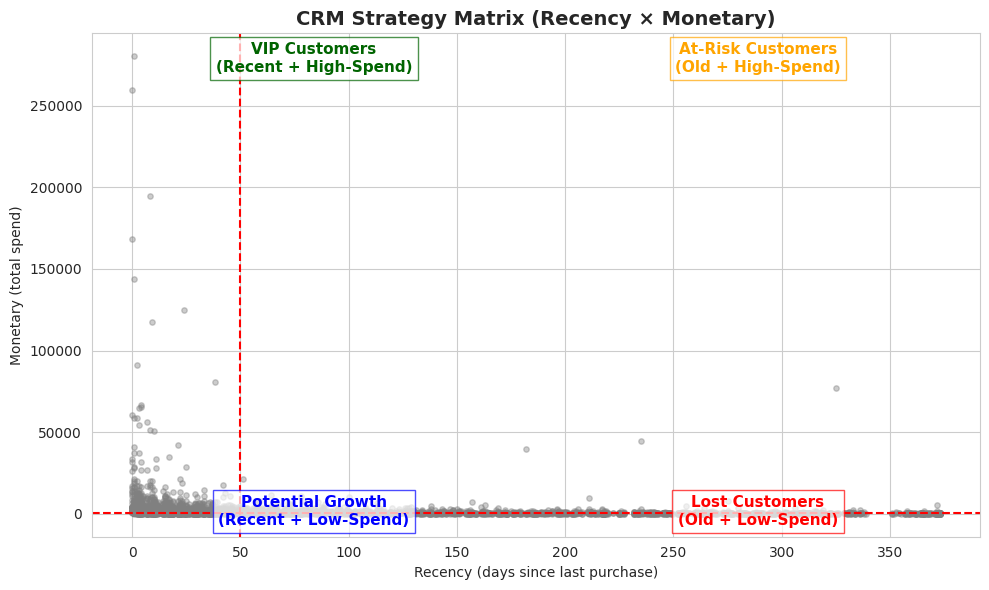

In [ ]:
import matplotlib.pyplot as plt

# Thresholds (Median 기준값)
recency_threshold = rfm['Recency'].median()
monetary_threshold = rfm['Monetary'].median()

plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(rfm['Recency'], rfm['Monetary'], alpha=0.4, s=15, color="gray")

# 기준선
plt.axvline(recency_threshold, color='red', linestyle='--')
plt.axhline(monetary_threshold, color='red', linestyle='--')

# 제목/축 라벨
plt.title("CRM Strategy Matrix (Recency × Monetary)", fontsize=14, fontweight='bold')
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Monetary (total spend)")

# 범례 대신 사분면 라벨을 그래프 바깥쪽에 배치
labels = {
    "VIP Customers\n(Recent + High-Spend)": (0.25, 0.95, "darkgreen"),
    "At-Risk Customers\n(Old + High-Spend)": (0.75, 0.95, "orange"),
    "Potential Growth\n(Recent + Low-Spend)": (0.25, 0.05, "blue"),
    "Lost Customers\n(Old + Low-Spend)": (0.75, 0.05, "red"),
}

for text, (x, y, color) in labels.items():
    plt.text(x, y, text,
             transform=plt.gca().transAxes,   # 축 비율 좌표계로 배치
             ha='center', va='center',
             fontsize=11, fontweight='bold', color=color,
             bbox=dict(facecolor="white", edgecolor=color, alpha=0.7))

plt.tight_layout()
plt.show()



## **🔊Process03 - RFM 등급화**  
---
### 1. 분석 흐름
-  **Scaling & Score 산출**  
   - RFM 지표 간 크기 차이(스케일)를 맞추어 공정하게 비교  
   - Recency·Frequency·Monetary를 동일 가중치로 합산 → 0~100 점수화  

-  **Grading (등급화)**  
   - 점수를 기준으로 고객을 5개 그룹으로 분류 (01.Very Strong ~ 05.Very Weak)  

-  **등급별 기여도 분석**  
   - 그룹별 고객 수·매출 기여율 비교 및 시각화 → VIP 의존 구조 확인  



### 🔶 Scaling & Score 산출
---

- R/F/M 지표를 min-max scaling으로 정규화
- Recency는 낮을수록 좋으므로 (1 – 정규화값)으로 변환
- 세 지표를 동일 가중치 합산 → 0~100 점수화

In [ ]:
# 원본 보존
rfm['Monetary_raw'] = rfm['Monetary']
rfm['Recency_raw']  = rfm['Recency']
rfm['Frequency_raw'] = rfm['Frequency']


In [ ]:
# Min max scale - 최대값을 1, 최소값을 0으로 표준화
from sklearn.preprocessing import minmax_scale

In [ ]:
# 최근성은 숫자가 작을수록, 즉 최근 구매일이 얼마 지나지 않은 고객이 더 점수가 높음
rfm['Recency'] = minmax_scale(rfm['Recency_raw'], axis=0)
rfm['Recency'] = 1 - rfm['Recency']

rfm['Frequency'] = minmax_scale(rfm['Frequency_raw'], axis=0)
rfm['Monetary']  = minmax_scale(rfm['Monetary_raw'], axis=0)

In [ ]:
# Score(0~100점 환산)
rfm['Score'] = rfm['Recency'] + rfm['Frequency'] + rfm['Monetary']
rfm['Score'] = minmax_scale(rfm['Score'], axis=0, copy=True) * 100
rfm['Score'] = round(rfm['Score'], 0)
rfm.head(5)

,CustomerID,Recency,RecencyGroup,Frequency,Monetary,Monetary_raw,Recency_raw,Frequency_raw,Score
0,12346.0,0.128686,150d+,0.000000,0.275443,77183.60,325,1,16.0
1,12347.0,0.994638,0-30d,0.028846,0.015368,4310.00,2,7,42.0
2,12348.0,0.798928,61-90d,0.014423,0.006401,1797.24,75,4,33.0
3,12349.0,0.951743,0-30d,0.000000,0.006259,1757.55,18,1,39.0
4,12350.0,0.168901,150d+,0.000000,0.001180,334.40,310,1,7.0


### 🔶 Grade(점수) 구간화
---
- Score 기준 5등급 (Very Strong ~ Very Weak) 분류
- 단순하고 직관적 해석 가능

※ 참고: 본 프로젝트에서는 단순화를 위해 점수 기반 임계값(60/40/20)을 적용했음.  
실무에서는 사분위(Quartile) 기반 구간화나 도메인 규칙(예: 90일 미구매=휴면), 또는 비즈니스 특화 기준을 활용하는 것이 일반적임.


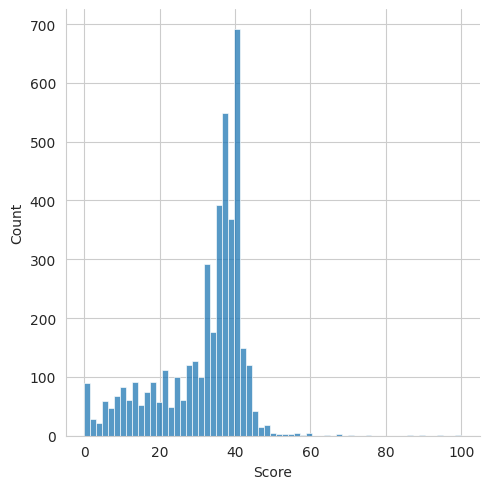

In [ ]:
sns.displot(rfm['Score']);


In [ ]:
rfm.head(5)

,CustomerID,Recency,RecencyGroup,Frequency,Monetary,Monetary_raw,Recency_raw,Frequency_raw,Score
0,12346.0,0.128686,150d+,0.000000,0.275443,77183.60,325,1,16.0
1,12347.0,0.994638,0-30d,0.028846,0.015368,4310.00,2,7,42.0
2,12348.0,0.798928,61-90d,0.014423,0.006401,1797.24,75,4,33.0
3,12349.0,0.951743,0-30d,0.000000,0.006259,1757.55,18,1,39.0
4,12350.0,0.168901,150d+,0.000000,0.001180,334.40,310,1,7.0


In [ ]:
# ▶ 점수별로 고객의 등급을 부여
# 60점 이상 Very storong
# 40~60점 Storng
# 20~40점 Normal
# 10~20점 Weak
# 0~10점 Very Weak

rfm['Grade'] = rfm['Score'].apply(lambda x : '01.Very Strong' if x>=60 else
                                  ('02.Strong' if x>=40 else
                                   ('03.Normal' if x>=20 else
                                    ('04.Weak' if x>=10 else '05.Very Weak'))))
rfm.head(5)

,CustomerID,Recency,RecencyGroup,Frequency,Monetary,Monetary_raw,Recency_raw,Frequency_raw,Score,Grade
0,12346.0,0.128686,150d+,0.000000,0.275443,77183.60,325,1,16.0,04.Weak
1,12347.0,0.994638,0-30d,0.028846,0.015368,4310.00,2,7,42.0,02.Strong
2,12348.0,0.798928,61-90d,0.014423,0.006401,1797.24,75,4,33.0,03.Normal
3,12349.0,0.951743,0-30d,0.000000,0.006259,1757.55,18,1,39.0,03.Normal
4,12350.0,0.168901,150d+,0.000000,0.001180,334.40,310,1,7.0,05.Very Weak


### 🔶 등급별 기여도 분석
---

- Grade별 고객 수, 총 매출, 평균 매출, 매출 기여율을 집계
- 고객 수 비중 vs 매출 기여율을 비교하는 막대그래프
- 매출 기여율을 직관적으로 보여주는 파이차트



In [ ]:
rfm.groupby('Grade')['CustomerID'].count()

,CustomerID
Grade,
01.Very Strong,13
02.Strong,1056
03.Normal,2503
04.Weak,453
05.Very Weak,313


In [ ]:
# 등급별 고객 수 & 매출 기여율 요약
grade_summary = (
    rfm.groupby('Grade')
       .agg(
           NumCustomers=('CustomerID', 'count'),
           TotalSales=('Monetary_raw', 'sum'),   # 원본값
           AvgSales=('Monetary_raw', 'mean')
       )
       .reset_index()
)
# 전체 매출 대비 비중 계산
total_sales = grade_summary['TotalSales'].sum()
grade_summary['SalesShare(%)'] = (grade_summary['TotalSales'] / total_sales * 100).round(1)

# 등급 순서 정렬 (VIP → Very Weak 순서)
grade_order = ['01.Very Strong','02.Strong','03.Normal','04.Weak','05.Very Weak']
grade_summary['Grade'] = pd.Categorical(grade_summary['Grade'], categories=grade_order, ordered=True)
grade_summary = grade_summary.sort_values('Grade')

grade_summary


,Grade,NumCustomers,TotalSales,AvgSales,SalesShare(%)
0,01.Very Strong,13,1576492.350,121268.642308,17.7
1,02.Strong,1056,4351269.260,4120.520133,48.8
2,03.Normal,2503,2565314.313,1024.895850,28.8
3,04.Weak,453,296716.911,655.004219,3.3
4,05.Very Weak,313,121615.070,388.546550,1.4


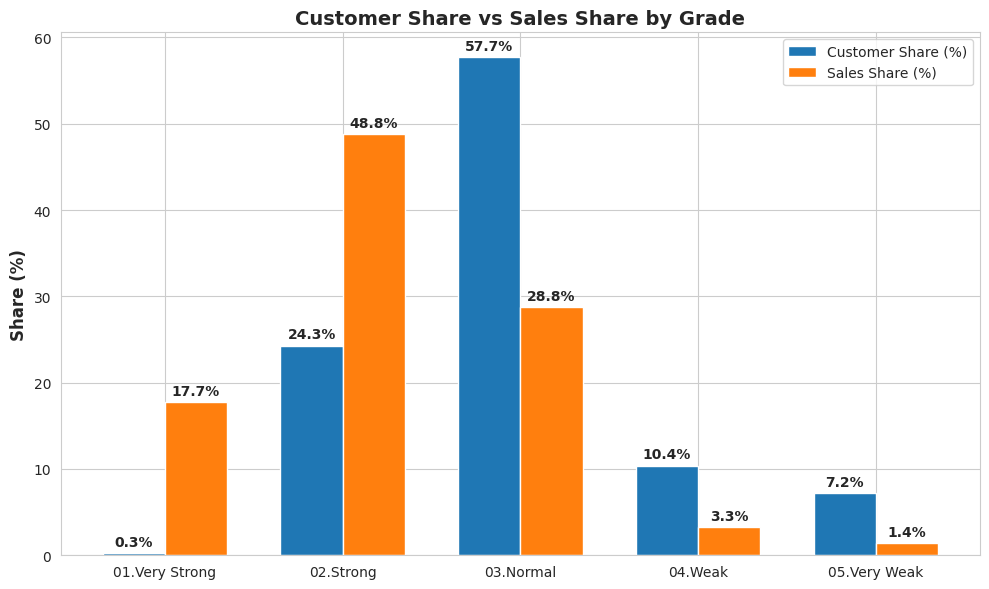

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 고객 수 비중 & 매출 비중 데이터 준비
grade_summary['CustomerShare(%)'] = (grade_summary['NumCustomers'] / grade_summary['NumCustomers'].sum() * 100).round(1)

x = np.arange(len(grade_summary['Grade']))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

# 고객 수 비중
bars1 = ax.bar(x - width/2, grade_summary['CustomerShare(%)'], width, label='Customer Share (%)')
# 매출 비중
bars2 = ax.bar(x + width/2, grade_summary['SalesShare(%)'], width, label='Sales Share (%)')

# 레이블/제목
ax.set_ylabel('Share (%)', fontsize=12, fontweight='bold')
ax.set_title('Customer Share vs Sales Share by Grade', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(grade_summary['Grade'], rotation=0)
ax.legend()

# 퍼센트 라벨 표시
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


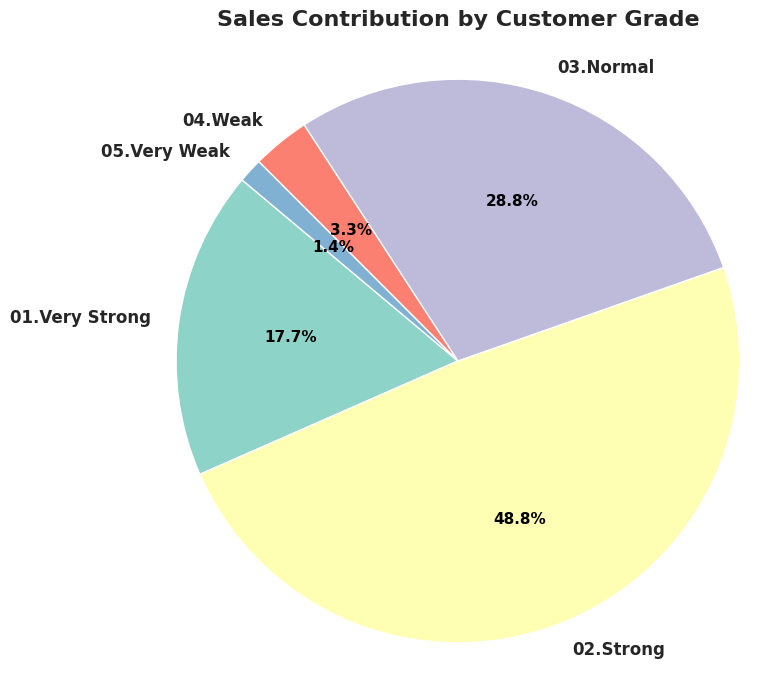

In [ ]:
import matplotlib.pyplot as plt

# 등급별 매출 기여율 데이터
sales_share = grade_summary.set_index('Grade')['SalesShare(%)']

# 파이차트
plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors

wedges, texts, autotexts = plt.pie(
    sales_share,
    labels=sales_share.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor':'white'}
)


plt.setp(texts, size=12, weight="bold") # 등급 라벨
plt.setp(autotexts, size=11, weight="bold", color="black")  # 퍼센트 값

# 원형 비율 맞추기
plt.axis('equal')

plt.title("Sales Contribution by Customer Grade", fontsize=16, fontweight='bold', pad=20)
plt.show()



### ▶︎ 그래프 해석 & 인사이트

#### 1. Grade(점수) 구간화 결과

| Grade          | NumCustomers | TotalSales   | AvgSales   | SalesShare(%) |
| -------------- | ------------ | ------------ | ---------- | ------------- |
| 01.Very Strong | 13           | 1,576,492.35 | 121,268.64 | 17.7          |
| 02.Strong      | 1,056        | 4,351,269.26 | 4,120.52   | 48.8          |
| 03.Normal      | 2,503        | 2,565,314.31 | 1,024.90   | 28.8          |
| 04.Weak        | 453          | 296,716.91   | 655.00     | 3.3           |
| 05.Very Weak   | 313          | 121,615.07   | 388.55     | 1.4           |


#### 2. 주요 해석
- 소수의 VIP 고객(`01.Very Strong` + `02.Strong`)이 전체 매출의 **66.5%** 차지  
- 고객 수가 가장 많은 `03.Normal` 그룹(2,503명)은 매출 기여가 **28.8%**에 불과 → **매출 편중 심화**  
- 매출 기여율은 **Monetary(지출액)**에 의해 크게 좌우됨 → 고액 고객 중심 구조 확인  

#### 3. 비즈니스 시사점
- **VIP·우수 고객(상위 20%) 유지**가 핵심 과제 → 이탈 시 매출 타격 큼  
- `03.Normal` 이하 그룹은 고객 수는 많으나 매출 기여 낮음 → **업셀링·재구매 유도 전략 필요**  
- 전형적인 **파레토 법칙(20% 고객이 80% 매출 기여)** 구조 확인  
- 단순 점수 기반 분류로는 고객 행동 특성을 충분히 설명하기 어려움 → 특히 규모가 큰 Normal 그룹은 다양한 특성이 섞여 있어,  
다음 단계에서 K-means 군집분석을 통해 정교하게 세분화할 필요가 있음


## **🔊Process04 - K-means 군집화**  
---
### 1. 개요
- Rule-based RFM 등급화는 임계값 기준이 **주관적**이라는 한계가 있음  
- K-means를 활용해 **데이터 기반으로 숨겨진 고객 그룹**을 발견하고,  
  기존 Grade 분류를 **보완·검증**  

### 2. 분석 흐름
- RFM Scaling → 최적 K 탐색(Elbow·Silhouette) → KMeans 적용 → 클러스터 해석(RFM 프로파일) → Rule vs Cluster 비교 → 인사이트 도출


### 🔶 최적 K 탐색 (Elbow·Silhouette)
- RFM(정규화) 데이터로 Elbow & Silhouette 분석 결과, K=4가 최적 군집수로 선정됨

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 이미 minmax_scale로 스케일링 된 Recency, Frequency, Monetary 사용
X = rfm[['Recency','Frequency','Monetary']].values
X

array([[1.28686327e-01, 0.00000000e+00, 2.75443343e-01],
       [9.94638070e-01, 2.88461538e-02, 1.53683623e-02],
       [7.98927614e-01, 1.44230769e-02, 6.40069761e-03],
       ...,
       [9.81233244e-01, 4.80769231e-03, 6.22050635e-04],
       [9.91957105e-01, 7.21153846e-02, 7.46293026e-03],
       [8.87399464e-01, 9.61538462e-03, 6.54359438e-03]])

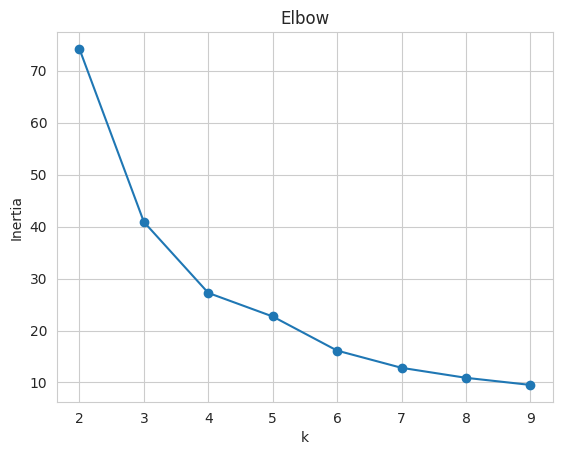

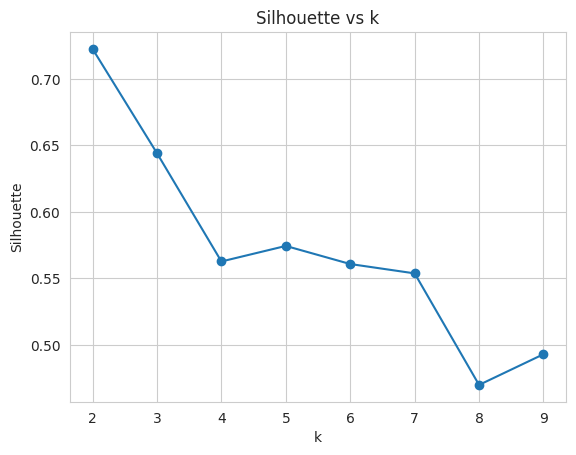

2

In [ ]:
# 최적 k 찾기 (엘보우 방법)
inertia, sils, K_range = [], [], range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X)
    inertia.append(km.inertia_)
    sils.append(silhouette_score(X, labels))

# Elbow
plt.plot(list(K_range), inertia, 'o-'); plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow'); plt.show()
# Silhouette
plt.plot(list(K_range), sils, 'o-'); plt.xlabel('k'); plt.ylabel('Silhouette'); plt.title('Silhouette vs k'); plt.show()

best_k = int(K_range[np.argmax(sils)])
best_k

### 🔶 K-means 모델 적용

- 고객별 클러스터 부여, 클러스터 요약 테이블 산출
- 클러스터별 매출 기여도 분석

In [ ]:
# 실제 클러스터링 (예: k=4 선택)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X)

In [ ]:
# 클러스터 결과 요약
cluster_summary = (
    rfm.groupby('Cluster')
       .agg(Recency=('Recency','mean'),
            Frequency=('Frequency','mean'),
            Monetary=('Monetary','mean'),
            NumCustomers=('CustomerID','count'),
            Score=('Score','mean'))
)
display(cluster_summary)

,Recency,Frequency,Monetary,NumCustomers,Score
Cluster,,,,,
0,0.946830,0.025752,0.011545,2208,39.804801
1,0.482524,0.004156,0.002560,598,19.780936
2,0.775107,0.007785,0.003599,1035,31.811594
3,0.172957,0.001683,0.002009,497,7.138833


In [ ]:
# 클러스터별 매출 기여도 요약
cluster_sales_summary = (
    rfm.groupby('Cluster')
       .agg(
           NumCustomers=('CustomerID', 'count'),
           TotalSales=('Monetary_raw', 'sum'),    # 원본 매출 합계
           AvgSales=('Monetary_raw', 'mean')      # 원본 매출 평균
       )
       .reset_index()
)

# 전체 매출 대비 비중
total_sales = cluster_sales_summary['TotalSales'].sum()
cluster_sales_summary['SalesShare(%)'] = (cluster_sales_summary['TotalSales'] / total_sales * 100).round(1)

display(cluster_sales_summary)


,Cluster,NumCustomers,TotalSales,AvgSales,SalesShare(%)
0,0,2208,7150958.661,3238.658814,80.2
1,1,598,431278.771,721.201958,4.8
2,2,1035,1047515.442,1012.092214,11.8
3,3,497,281655.030,566.710322,3.2


In [ ]:
rfm.groupby('Cluster')['Monetary_raw'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2208.0,3238.658814,12278.144047,6.90,498.7850,1162.365,2634.3350,280206.02
1,598.0,721.201958,2529.675829,12.75,189.7575,350.570,656.2125,44534.30
2,1035.0,1012.092214,1191.179657,6.20,319.1850,640.500,1246.7800,11581.80
3,497.0,566.710322,3499.375843,3.75,154.9900,271.050,417.9500,77183.60


### 🔶  클러스터 해석 및 시각화

(A) R/F/M 프로파일 비교(정규화 bar)

(B) 2D 투영(PCA) 산점도

(C) Rule vs Cluster 교차표

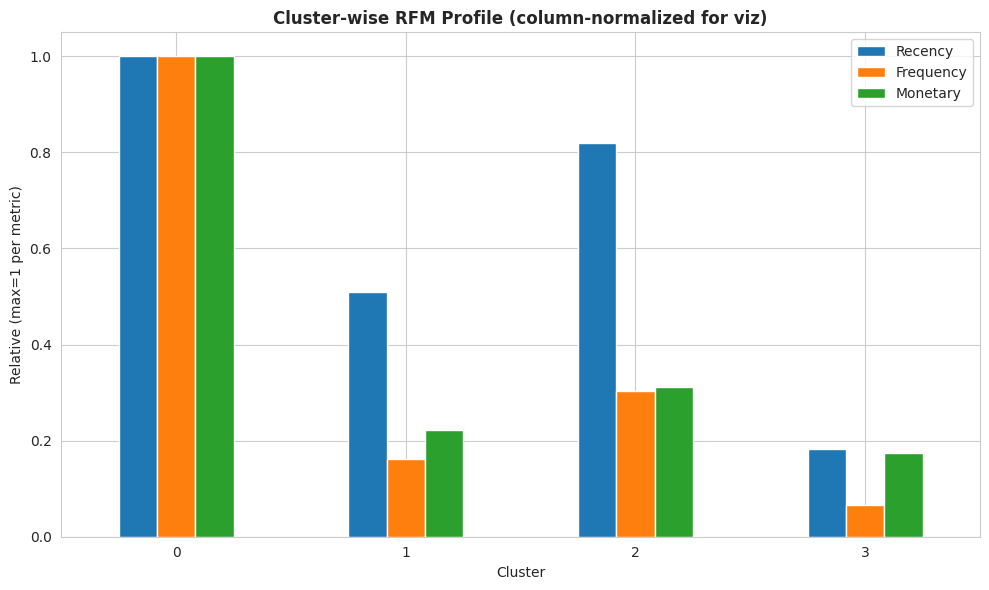

In [ ]:
# Bar - 시각화 전용 정규화(각 지표별 max=1)
plot_cols = ['Recency','Frequency','Monetary']
cs_norm = cluster_summary[plot_cols] / cluster_summary[plot_cols].max(axis=0)

ax = cs_norm.plot(kind='bar', figsize=(10,6))

ax.set_title("Cluster-wise RFM Profile (column-normalized for viz)", fontweight='bold')
ax.set_ylabel("Relative (max=1 per metric)"); ax.set_xlabel("Cluster")
ax.tick_params(axis='x', rotation=0); plt.tight_layout();
plt.show()

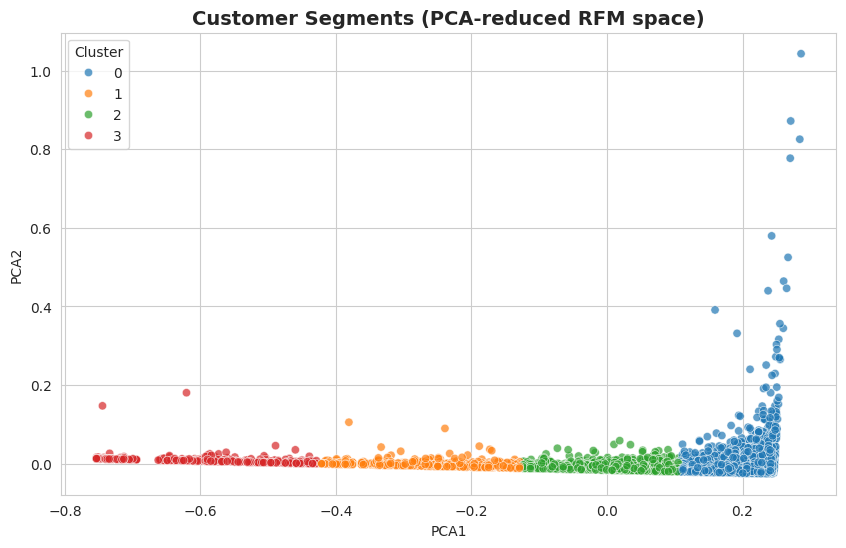

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm[['Recency','Frequency','Monetary']])

rfm['PCA1'] = rfm_pca[:,0]
rfm['PCA2'] = rfm_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="tab10",
    alpha=0.7
)
plt.title("Customer Segments (PCA-reduced RFM space)", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
# Grade × Cluster 교차표
pd.crosstab(rfm['Grade'], rfm['Cluster'])


Cluster,0,1,2,3
Grade,,,,
01.Very Strong,13,0,0,0
02.Strong,1056,0,0,0
03.Normal,1139,329,1035,0
04.Weak,0,269,0,184
05.Very Weak,0,0,0,313


### ▶︎ 클러스터링 결과 해석 & 인사이트

#### 1. Cluster Summary 해석
| Cluster | Recency           | Frequency        | Monetary         | NumCustomers | Score | 고객 유형                      |
| ------- | ----------------- | ---------------- | ---------------- | ------------ | ----- | -------------------------- |
| 0       | **0.95 (가장 최근)**  | 0.026 (상대적으로 높음) | 0.012 (상대적으로 높음) | 2208         | 39.8  | **Core Value (주요 매출 기여층)** |
| 1       | 0.48 (중간)         | 0.004 (매우 낮음)    | 0.003 (매우 낮음)    | 598          | 19.8  | **At-Risk (잠재 유지 고객)**     |
| 2       | 0.78 (다소 최근)      | 0.008 (낮음)       | 0.004 (낮음)       | 1035         | 31.8  | **Growth (신규 성장층)**        |
| 3       | **0.17 (매우 오래됨)** | 0.002 (거의 없음)    | 0.002 (거의 없음)    | 497          | 7.1   | **Dormant (휴면·이탈 위험군)**    |


---
#### 2. 클러스터별 매출 기여도
| Cluster | NumCustomers | TotalSales (원) | SalesShare(%) |
| ------- | ------------ | --------------- | ------------- |
| 0 (Core Value) | 2208 | 약 7.15M | **80.2%** |
| 1 (At-Risk)    | 598  | 약 0.43M | 4.8% |
| 2 (Growth)     | 1035 | 약 1.05M | 11.8% |
| 3 (Dormant)    | 497  | 약 0.28M | 3.2% |

---

#### 3. K-means 군집화 인사이트  

- **Cluster 0 — Core Value (핵심 활동 고객군)**  
  - Recency 높음 → 최근 구매 활발  
  - Frequency·Monetary 상대적으로 높음  
  - 고객 수 2200명+으로 규모도 가장 큼  
  - **매출 기여도: 80% 이상 차지 (압도적 핵심군)**  

- **Cluster 1 — At-Risk (이탈 위험 고객군)**  
  - Recency 중간 수준 → 최근 활동은 일부 있음  
  - Frequency·Monetary 모두 낮음  
  - **매출 기여도: 약 5% 수준 (잠재적 유지 필요)**  

- **Cluster 2 — Growth (신규 성장 고객군)**  
  - Recency 다소 높음 → 비교적 최근 유입  
  - Frequency·Monetary 낮음 → 구매 전환 초기 단계  
  - **매출 기여도: 약 12% (성장 잠재력 보유)**  

- **Cluster 3 — Dormant (휴면 고객군)**  
  - Recency 매우 낮음 → 장기 미구매  
  - Frequency·Monetary 거의 없음  
  - **매출 기여도: 약 3% (ROI 낮아 효율적 관리 필요)**  

---

#### 4. 종합 인사이트
- 군집별 행동 특성과 매출 기여도를 종합하면, **Core Value 군은 전체 매출의 80% 이상을 차지하는 절대적 핵심**이며, Growth 군은 매출 기여는 아직 작지만 성장 잠재력이 큼.  
- At-Risk 군은 매출 비중은 작으나 **재활성화 여부에 따라 장기적으로 가치 창출 가능성**이 있으며, Dormant 군은 ROI가 낮아 효율적 관리 전략이 필요함.  
- 따라서, 본 분석에서는 이 인사이트를 기반으로 **그룹별 맞춤형 CRM 전략 도출**을 최종 단계에서 제안함

## **🔊Process05 - 지표 기획 **  




### 🔶 데이터 통합 (merge)
- 원본 거래 데이터 + 고객 속성 (Score, Grade, Cluster) 결합
- Date를 가공해 년-월 단위로 변환 (Date_1)

In [ ]:
rfm.head()

,CustomerID,Recency,RecencyGroup,Frequency,Monetary,Monetary_raw,Recency_raw,Frequency_raw,Score,Grade,Cluster,PCA1,PCA2
0,12346.0,0.128686,150d+,0.000000,0.275443,77183.60,325,1,16.0,04.Weak,3,-0.620530,0.180365
1,12347.0,0.994638,0-30d,0.028846,0.015368,4310.00,2,7,42.0,02.Strong,0,0.241859,0.006051
2,12348.0,0.798928,61-90d,0.014423,0.006401,1797.24,75,4,33.0,03.Normal,2,0.045638,-0.003334
3,12349.0,0.951743,0-30d,0.000000,0.006259,1757.55,18,1,39.0,03.Normal,0,0.197800,-0.020436
4,12350.0,0.168901,150d+,0.000000,0.001180,334.40,310,1,7.0,05.Very Weak,3,-0.584500,0.006179


In [ ]:
# 기존 Data에 고객의 등급(Grade) Data를 left join
df = pd.merge(df, rfm[['CustomerID','Score','Grade','Cluster']], how='left', on='CustomerID')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Score,Grade,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,7.0,05.Very Weak,3
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,7.0,05.Very Weak,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3


In [ ]:
# 지표 기획에 앞서, 년월만 새로운 col로 정의 (※ 월별 분석을 하기위한 준비과정)
df['Date_1'] = df["Date"].dt.strftime("%Y-%m")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_cost,Score,Grade,Cluster,Date_1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,7.0,05.Very Weak,3,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,7.0,05.Very Weak,3,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,7.0,05.Very Weak,3,2010-12


### 🔶 지표 기획


#### 🔷 기초 월별 지표 (Baseline Usage Trends)
- 월 별 이용 고객 현황
- 월 별 이용 건수
- 월 별 이용 국가

#### · 월 별 이용 고객 현황
---

In [ ]:
# 월별 이용 고객 현황 - 날짜별 고객 방문 수 변화
df_cus = df.groupby('Date_1',as_index=False)['CustomerID'].nunique()
df_cus.tail(5)

,Date_1,CustomerID
8,2011-08,935
9,2011-09,1266
10,2011-10,1364
11,2011-11,1664
12,2011-12,615


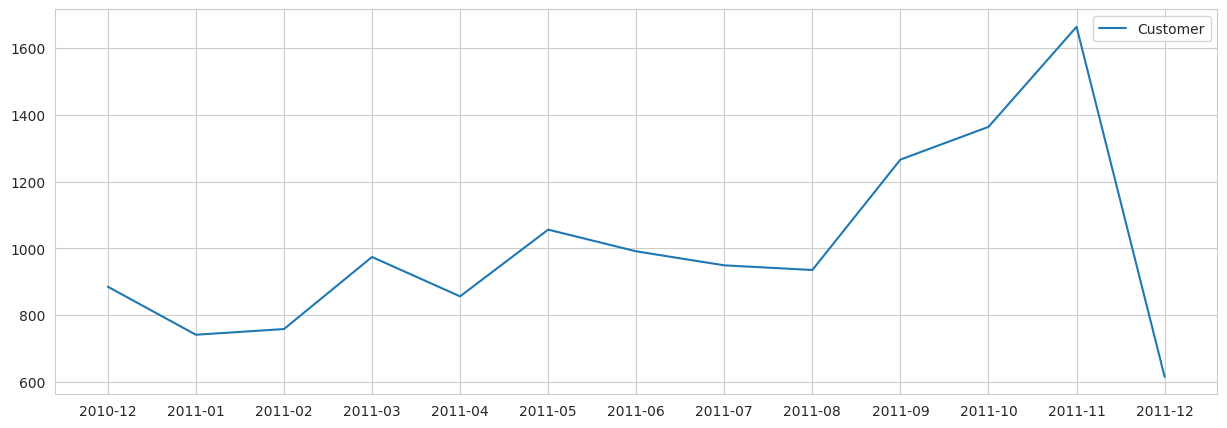

In [ ]:
# 2010.12 런칭이후 사용자 수가 증가하고 2011.11월 Peak를 달성했으나 다시 대폭 하락함

# 12월은 9일까지만 분석했기 때문에 11월까지만 보기
# 9,10,11월 빠르게 성장한 것 확인 가능
plt.plot(df_cus['Date_1'], df_cus['CustomerID'], label='Customer');
plt.legend();
plt.gcf().set_size_inches(15, 5)

#### · 월 별 이용 건수
---

In [ ]:
# 월별 이용 건수 - 월별 발생한 주문 수
# 위 지표와 비슷한 지표
df_cnt = df.groupby('Date_1',as_index=False)['InvoiceNo'].nunique()
df_cnt.head(5)

,Date_1,InvoiceNo
0,2010-12,1400
1,2011-01,987
2,2011-02,997
3,2011-03,1321
4,2011-04,1149


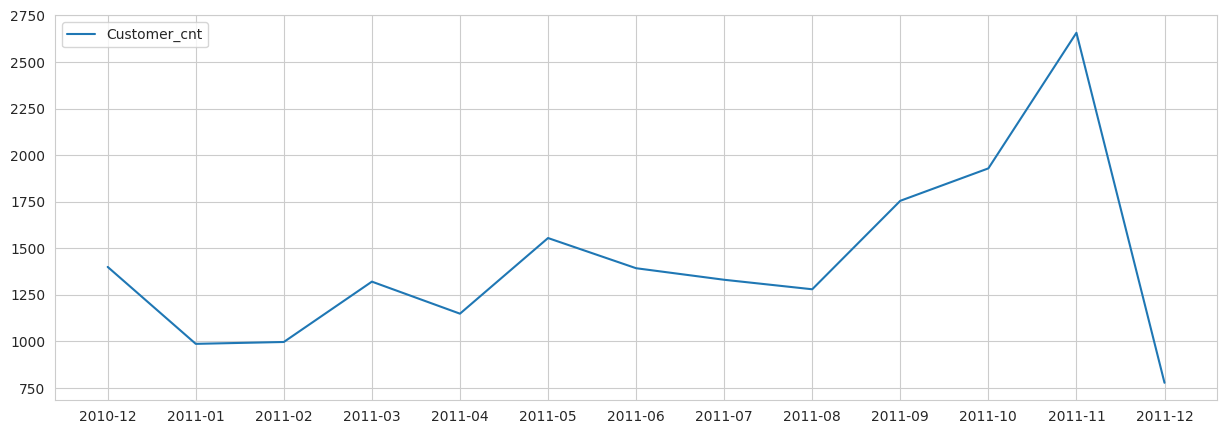

In [ ]:
# 월별 이용 고객수와 비슷한 양상
plt.plot(df_cnt['Date_1'], df_cnt['InvoiceNo'], label='Customer_cnt');
plt.legend();
plt.gcf().set_size_inches(15, 5)

#### · 월 별 이용 국가
---

In [ ]:
df['Country'].nunique()

37

In [ ]:
# 월별 이용 국가
df_country = df.groupby('Date_1',as_index=False)['Country'].nunique()
df_country.head(5)

,Date_1,Country
0,2010-12,22
1,2011-01,20
2,2011-02,24
3,2011-03,22
4,2011-04,24


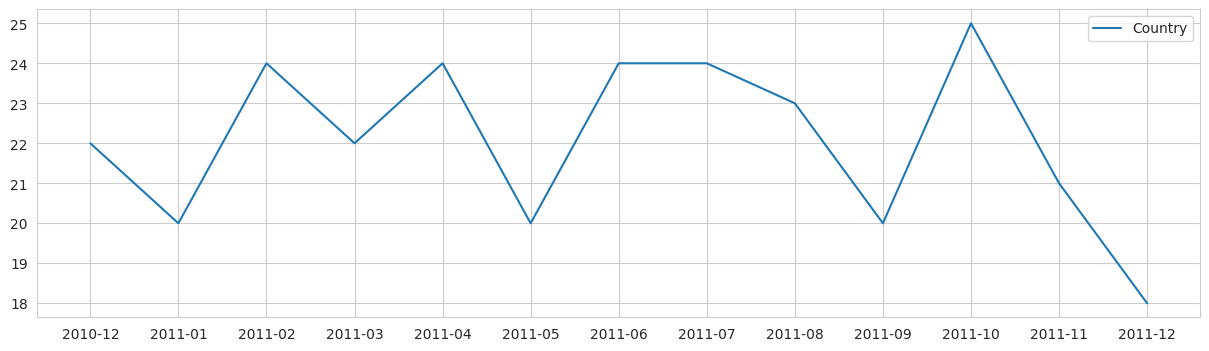

In [ ]:
plt.plot(df_country['Date_1'], df_country['Country'], label='Country');
plt.legend();
plt.gcf().set_size_inches(15, 4)

In [ ]:
# 가장 충성도가 높은 이용 나라
pd.DataFrame(df.groupby(['Country'])['InvoiceNo'].nunique().sort_values(ascending=False)).head(10)

,InvoiceNo
Country,
United Kingdom,16646
Germany,457
France,389
EIRE,260
Belgium,98
Netherlands,94
Spain,90
Portugal,57
Australia,57


#### 🔷 세분화 기반 지표 (Segmentation-based Metrics)

- 월 별 Grade 이용 비중
- 월 별 Cluster 비중 (stacked bar)

#### · 월 별 Grade 이용 비중
---

In [ ]:
df_grade = df.groupby(['Date_1', 'Grade'],as_index=False)['CustomerID'].nunique()
df_grade.head(5)


,Date_1,Grade,CustomerID
0,2010-12,01.Very Strong,11
1,2010-12,02.Strong,397
2,2010-12,03.Normal,291
3,2010-12,04.Weak,42
4,2010-12,05.Very Weak,144


In [ ]:
# 날짜(Date_1)별 · 등급(Grade)별 고객 수를 교차표 형태로 집계
df_pivot = pd.pivot_table(
    df_grade,                 # 피벗할 데이터프레임
    index='Date_1',           # 행 인덱스: 날짜
    columns='Grade',          # 열 인덱스: 고객 등급
    values='CustomerID',      # 데이터: 고객 ID (count 집계 기본 적용)
)

# NaN(값 없음)을 0으로 채워서 집계 누락 방지
df_pivot.fillna(0, inplace=True)

# 날짜별 총 고객 수(total) 계산 (5개 등급을 모두 합산)
df_pivot['total'] = (
    df_pivot['01.Very Strong']
  + df_pivot['02.Strong']
  + df_pivot['03.Normal']
  + df_pivot['04.Weak']
  + df_pivot['05.Very Weak']
)

df_pivot

Grade,01.Very Strong,02.Strong,03.Normal,04.Weak,05.Very Weak,total
Date_1,,,,,,
2010-12,11.0,397.0,291.0,42.0,144.0,885.0
2011-01,11.0,334.0,259.0,34.0,103.0,741.0
2011-02,11.0,318.0,286.0,43.0,100.0,758.0
2011-03,12.0,391.0,378.0,193.0,0.0,974.0
2011-04,12.0,360.0,338.0,146.0,0.0,856.0
2011-05,13.0,449.0,453.0,141.0,0.0,1056.0
2011-06,12.0,424.0,555.0,0.0,0.0,991.0
2011-07,12.0,421.0,516.0,0.0,0.0,949.0
2011-08,12.0,424.0,499.0,0.0,0.0,935.0


In [ ]:
# 각 열 값을 total 대비 비율로 변환 (정규화)
df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

# total 컬럼은 기준으로만 사용했으므로 제거
df_pivot.drop(['total'], axis=1, inplace=True)
df_pivot


Grade,01.Very Strong,02.Strong,03.Normal,04.Weak,05.Very Weak
Date_1,,,,,
2010-12,0.012429,0.448588,0.328814,0.047458,0.162712
2011-01,0.014845,0.450742,0.349528,0.045884,0.139001
2011-02,0.014512,0.419525,0.377309,0.056728,0.131926
2011-03,0.012320,0.401437,0.388090,0.198152,0.000000
2011-04,0.014019,0.420561,0.394860,0.170561,0.000000
2011-05,0.012311,0.425189,0.428977,0.133523,0.000000
2011-06,0.012109,0.427851,0.560040,0.000000,0.000000
2011-07,0.012645,0.443625,0.543730,0.000000,0.000000
2011-08,0.012834,0.453476,0.533690,0.000000,0.000000


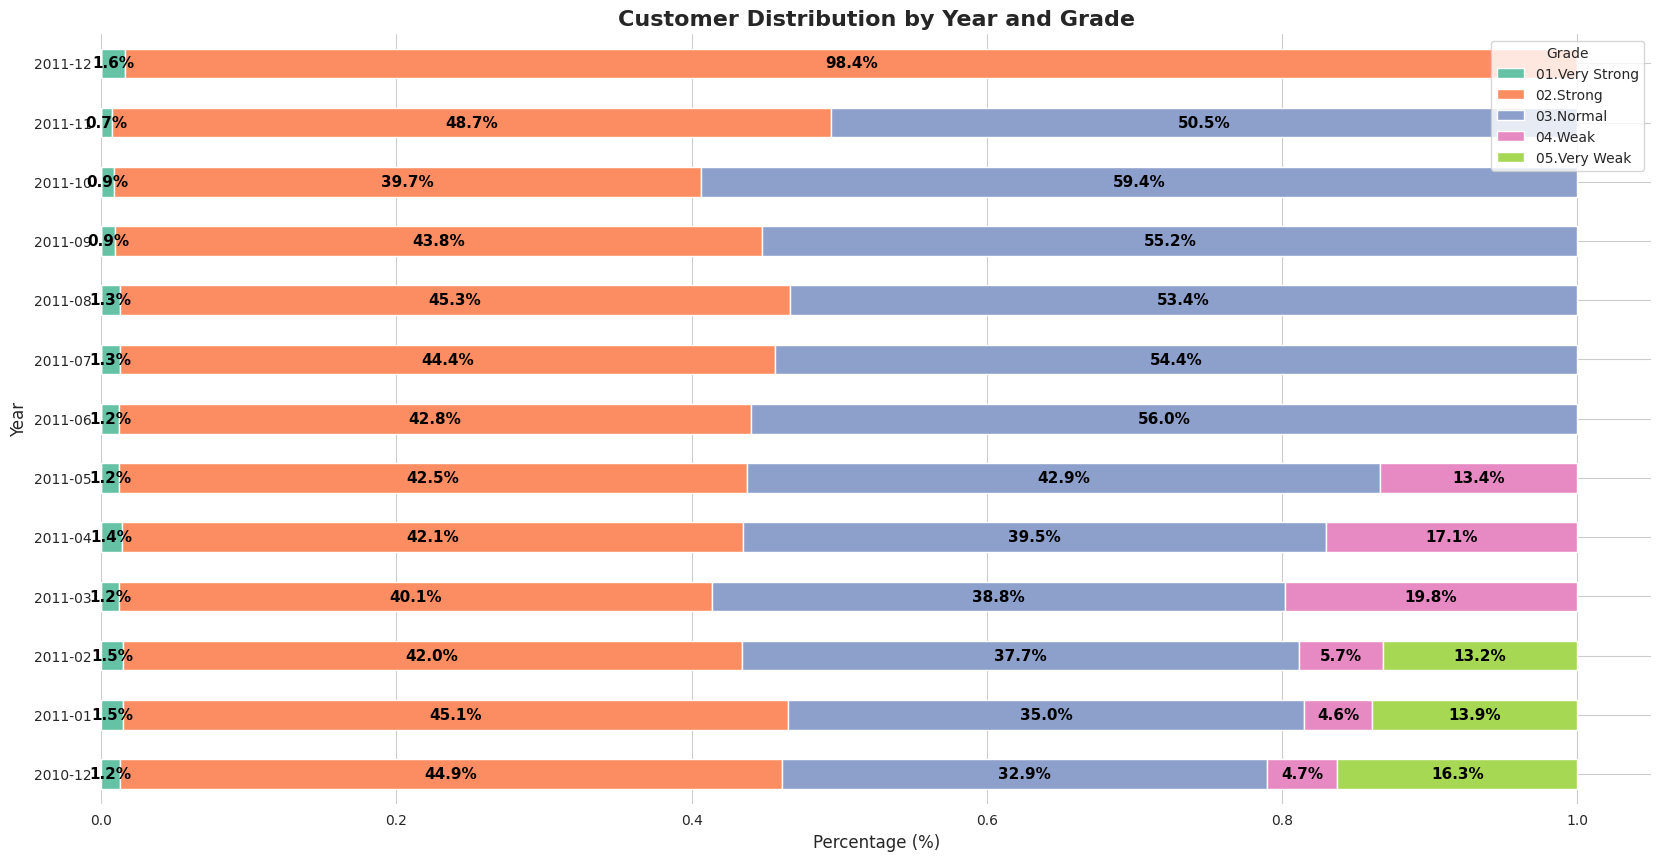

In [ ]:
# seaborn 팔레트 적용
colors = sns.color_palette("Set2", n_colors=df_pivot.shape[1])

# 누적 가로 막대 그래프
ax = df_pivot.plot(
    kind='barh',
    stacked=True,
    color=colors,
    figsize=(20, 10),
    title="Customer Distribution by Year and Grade",
    rot=0
)

# 각 막대 내부에 비율(%) 표시
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:  # 값이 있을 때만 표시
        ax.annotate(
            f"{width*100:.1f}%",  # 퍼센트 표시
            xy=(left + width/2, bottom + height/2),
            ha='center', va='center',
            color='black', fontsize=11, fontweight='bold'
        )

# 테두리 제거
plt.box(False)

# 타이틀 및 레이블 스타일링
plt.title("Customer Distribution by Year and Grade", fontsize=16, fontweight='bold')
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Year", fontsize=12)

plt.show()

#### · 월별 Cluster 비중 (stacked bar)
---

In [ ]:
# 월별 Cluster별 고객 수 집계
df_cluster = df.groupby(['Date_1','Cluster'], as_index=False)['CustomerID'].nunique()

In [ ]:
# Pivot 테이블 (행=월, 열=Cluster, 값=고객 수)
pivot_cluster = pd.pivot_table(
    df_cluster,
    index='Date_1',
    columns='Cluster',
    values='CustomerID'
).fillna(0)

In [ ]:
# 비율화 (각 달별 total 대비)
pivot_cluster = pivot_cluster.div(pivot_cluster.sum(axis=1), axis=0)
pivot_cluster

Cluster,0,1,2,3
Date_1,,,,
2010-12,0.613559,0.077966,0.125424,0.183051
2011-01,0.614035,0.078273,0.155196,0.152497
2011-02,0.589710,0.068602,0.180739,0.160950
2011-03,0.585216,0.081109,0.162218,0.171458
2011-04,0.596963,0.219626,0.174065,0.009346
2011-05,0.614583,0.203598,0.181818,0.000000
2011-06,0.632694,0.199798,0.167508,0.000000
2011-07,0.650158,0.129610,0.220232,0.000000
2011-08,0.663102,0.000000,0.336898,0.000000


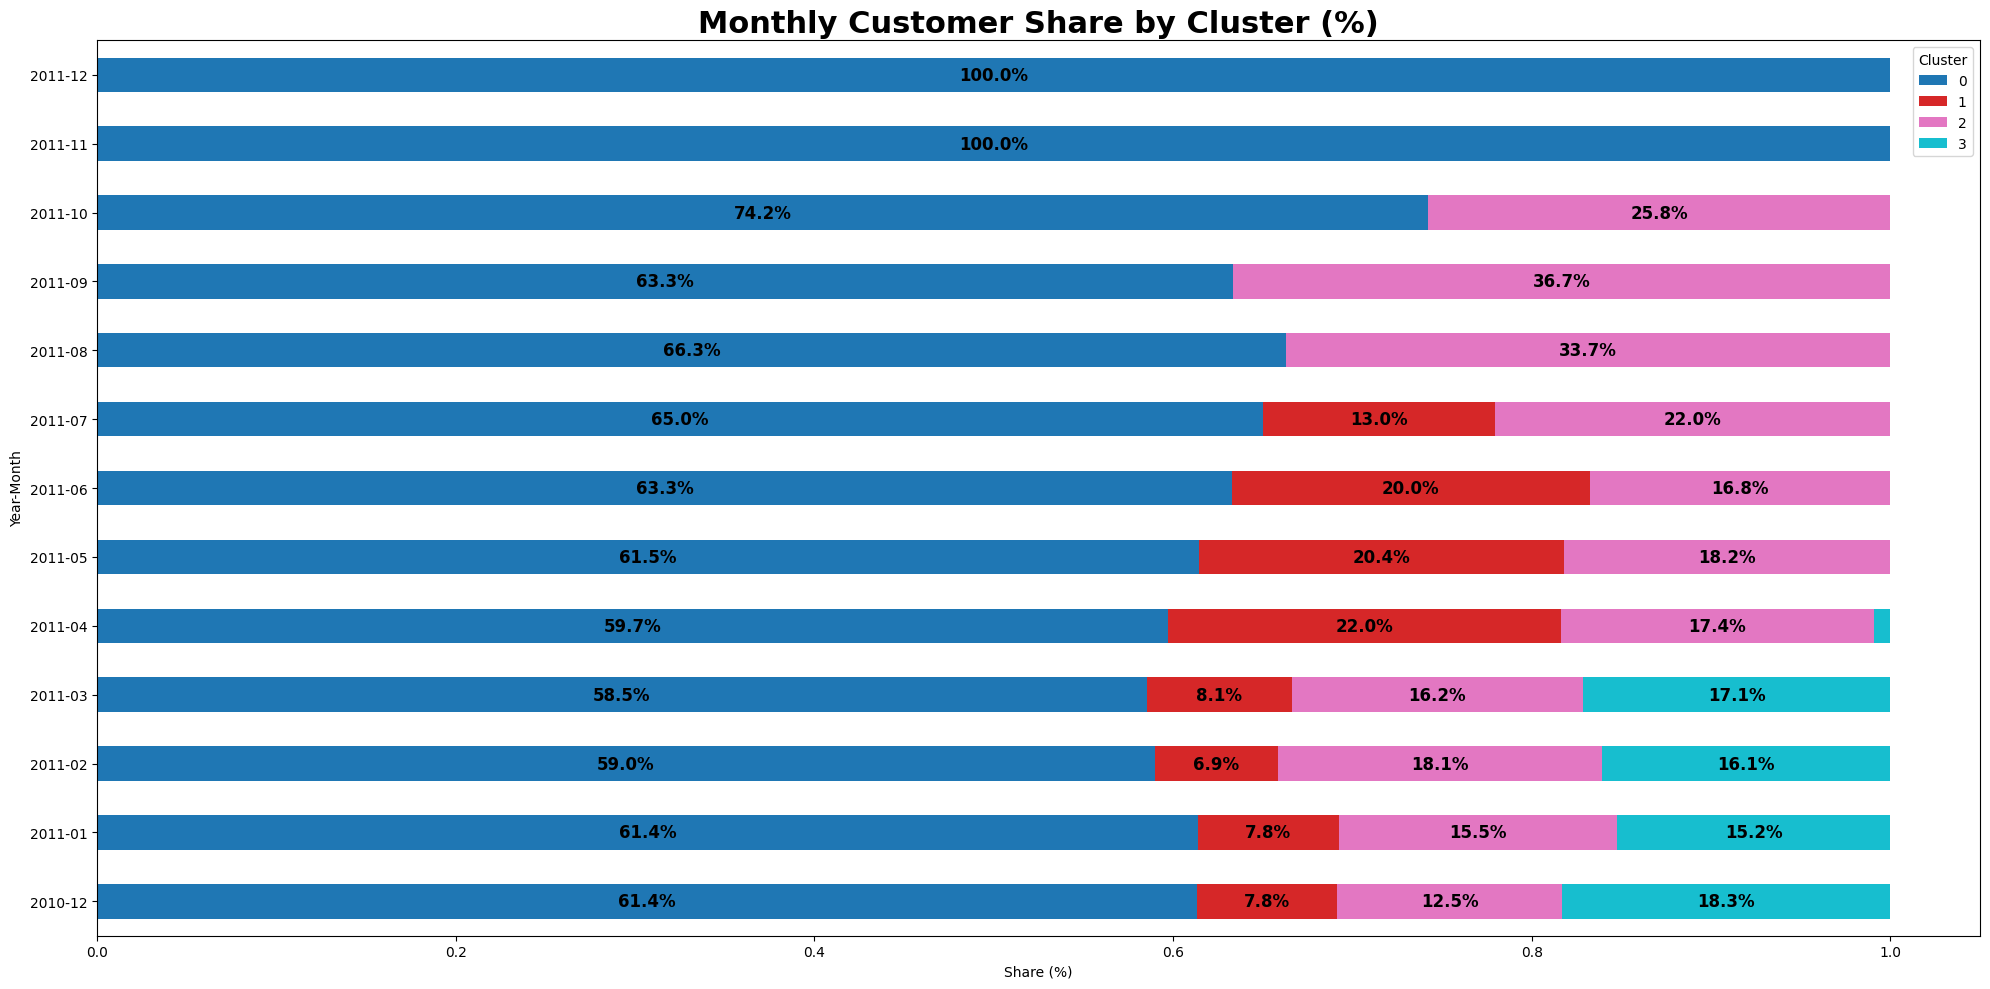

In [ ]:
# Stacked Bar 시각화
plt.style.use('default')
ax = pivot_cluster.plot(kind='barh', stacked=True, figsize=(20, 10), cmap="tab10")

ax.set_title("Monthly Customer Share by Cluster (%)", fontsize=22, fontweight='bold')
ax.set_xlabel("Share (%)")
ax.set_ylabel("Year-Month")

# 퍼센트 라벨 표시 (3% 이상만)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0.03:
        ax.annotate(f"{width*100:.1f}%",
                    (left + width/2, bottom + height/2),
                    ha='center', va='center',
                    color='black', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### · 해석 & 인사이트

#### 1. 월별 Grade 이용 비중

- 초기(2010-12 ~ 2011-02): 모든 Grade가 균등(0.2씩) → 고객 특성이 뚜렷하지 않음  
- 2011-03 ~ 2011-05: Weak/Very Weak 비중 감소, Strong 이상 고객 비중 유지  
- 2011-06 이후: 상위 Grade 중심으로 단순화, 2011-12에는 Very Strong/Strong만 존재  
- **인사이트**: 시간이 지날수록 약한 고객층은 이탈하고, 충성도가 높은 고객 비중이 강화됨  

<br>

#### 2. 월별 Cluster 이용 비중


- Cluster 0: 꾸준히 가장 큰 비중(60% 이상) → 2011-10 이후 74%, 말기엔 100%  
- Cluster 1·2: 초반(20% 수준) 존재했으나 점차 축소 → 2011-08 이후 소멸  
- Cluster 3: 초반(10~18%) 존재했으나 2011-05 이후 완전히 사라짐  
- **인사이트**: 시간이 갈수록 다양한 군집이 사라지고, 주력 고객군(Cluster 0)으로 집중됨

<br>

#### 3. 종합 시사점 및 전략 도출

##### 종합 인사이트
- **Grade 분석**: 약한 고객층 감소, 충성 고객 중심 구조로 변화  
- **Cluster 분석**: 다양한 군집이 점차 축소되고, 주력 고객군으로 집중  

##### 시사점
- **긍정적**: 고객 기반의 질적 향상, 충성 고객 확보 및 리텐션 강화  
- **리스크**: 특정 고객군(Cluster 0, 상위 Grade)에 과도하게 의존 → 고객층 다양성 약화 가능성  

##### 전략 제언
1. **충성 고객 Upselling/CRM 강화**: 핵심 고객의 구매력·재방문율 극대화  
2. **다양성 확보**: 사라진 중간 군집을 대체할 신규 고객 세그먼트 발굴 필요  
3. **리스크 관리**: 특정 소수 집단 의존도를 낮추기 위한 다변화 전략 (상품 포트폴리오, 채널 확장 등)  




## 🔊Process06 - Cohort분석

### 🔶 Cohort 분석 (Retention & 검증)
- 세분화된 고객군이 시간이 지남에 따라 어떻게 잔존/이탈하는지 확인하기 위해 Cohort 분석 수행

- 특히 K-means에서 분리된 Growth·At-Risk 그룹의 이탈 가능성을 검증하고, 고객의 시간 축 행동 패턴을 기반으로 장기 유지 전략을 도출하고자 함.”

###  🔶 전체 고객 Cohort 결과

- 첫 달 대비 급격한 이탈 발생 (Retention 초반 급락)

- 일부 Cohort는 2~4개월차에서 재활성화 패턴 확인

-  Cohort별 고객 규모 차이에 따라 잔존율 격차 존재”


In [ ]:
# Cohort Month (첫 구매 월)
df['InvoiceMonth'] = df['Date'].dt.to_period('M')
df['CohortMonth']  = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [ ]:
# Cohort Index (첫 구매월 이후 경과 개월 수)
def get_month_diff(d1, d2):
    return (d1.year - d2.year) * 12 + (d1.month - d2.month)

df['CohortIndex'] = df.apply(lambda row: get_month_diff(row['InvoiceMonth'].to_timestamp(),
                                                       row['CohortMonth'].to_timestamp()), axis=1)

In [ ]:
# Cohort별 고객 수 집계
cohort_data  = df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Retention Rate (잔존율)
cohort_size = cohort_pivot.iloc[:,0]
retention   = cohort_pivot.divide(cohort_size, axis=0)

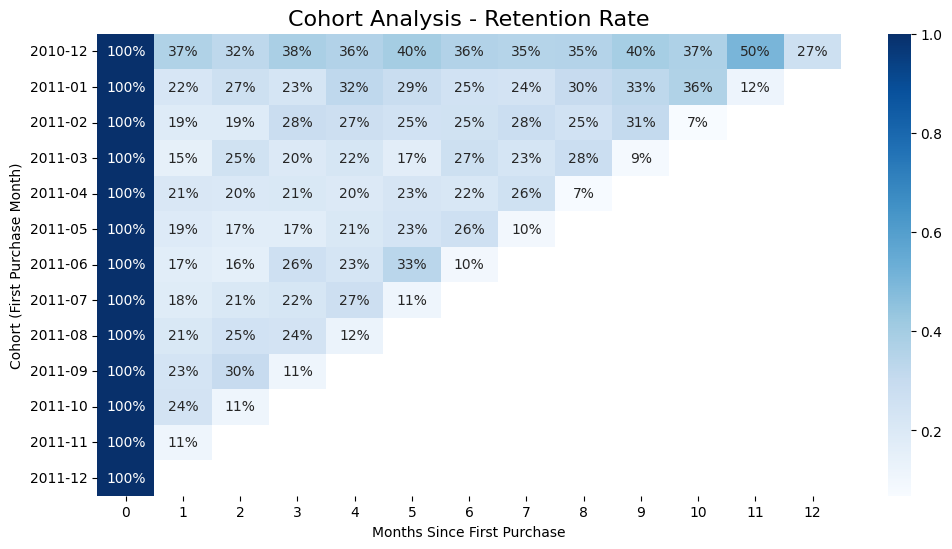

In [ ]:
# 시각화
plt.figure(figsize=(12,6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title('Cohort Analysis - Retention Rate', fontsize=16)
plt.ylabel('Cohort (First Purchase Month)')
plt.xlabel('Months Since First Purchase')

plt.show()



###  🔶 Cluster별 Cohort 결과


- Cluster 0: 안정적인 대규모 고객군, 후반 반등도 관찰

- Cluster 1: 1개월차부터 급격한 이탈, 고위험 고객군

- Cluster 2: 낮은 초기 유지율이나 일부 반등 발생, 성장 가능성 보유

- Cluster 3: 초반부터 잔존율 붕괴, 휴면/이탈 그룹”

In [ ]:
# Cluster별 Cohort 집계
cohort_cluster = (
    df.groupby(['Cluster','CohortMonth','CohortIndex'])['CustomerID']
      .nunique()
      .reset_index()
)

# Pivot (Cluster + CohortMonth → CohortIndex별 고객 수)
cohort_cluster_pivot = cohort_cluster.pivot_table(
    index=['Cluster','CohortMonth'],
    columns='CohortIndex',
    values='CustomerID'
)
cohort_cluster.head()

,Cluster,CohortMonth,CohortIndex,CustomerID
0,0,2010-12,0,543
1,0,2010-12,1,262
2,0,2010-12,2,232
3,0,2010-12,3,276
4,0,2010-12,4,263


In [ ]:

# Pivot (Cluster + CohortMonth → CohortIndex별 고객 수)
cohort_cluster_pivot = cohort_cluster.pivot_table(
    index=['Cluster','CohortMonth'],
    columns='CohortIndex',
    values='CustomerID'
)
cohort_cluster_pivot

CohortIndex             0      1      2      3      4      5      6      7   \
Cluster CohortMonth                                                           
0       2010-12      543.0  262.0  232.0  276.0  263.0  288.0  265.0  265.0   
        2011-01      193.0   62.0   79.0   59.0   89.0   81.0   73.0   67.0   
        2011-02      153.0   43.0   44.0   71.0   66.0   58.0   65.0   63.0   
        2011-03      172.0   39.0   65.0   55.0   62.0   56.0   68.0   79.0   
        2011-04      106.0   31.0   26.0   36.0   32.0   43.0   49.0   78.0   
        2011-05      105.0   28.0   27.0   26.0   31.0   45.0   75.0   27.0   
        2011-06      106.0   26.0   24.0   46.0   48.0   81.0   23.0    NaN   
        2011-07       70.0   18.0   25.0   33.0   51.0   21.0    NaN    NaN   
        2011-08       65.0   21.0   31.0   41.0   21.0    NaN    NaN    NaN   
        2011-09      118.0   56.0   90.0   34.0    NaN    NaN    NaN    NaN   
        2011-10      213.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
        2011-11      323.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
        2011-12       41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1       2010-12       69.0   16.0   12.0   16.0   23.0   29.0   28.0   18.0   
        2011-01       42.0    5.0    5.0   11.0   19.0   13.0    5.0    NaN   
        2011-02       35.0    4.0   12.0   13.0   11.0    8.0    NaN    NaN   
        2011-03       54.0   14.0   24.0   16.0   15.0    NaN    NaN    NaN   
        2011-04      128.0   12.0   15.0    9.0    NaN    NaN    NaN    NaN   
        2011-05      118.0   15.0    8.0    NaN    NaN    NaN    NaN    NaN   
        2011-06      100.0    8.0    NaN    NaN    NaN    NaN    NaN    NaN   
        2011-07       52.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2       2010-12      111.0   25.0   27.0   31.0   34.0   35.0   28.0   26.0   
        2011-01       90.0   20.0   22.0   26.0   26.0   26.0   25.0   34.0   
        2011-02       90.0   13.0   15.0   24.0   26.0   28.0   31.0   43.0   
        2011-03       92.0   15.0   25.0   19.0   24.0   20.0   53.0   25.0   
        2011-04       59.0   21.0   20.0   18.0   27.0   25.0   16.0    NaN   
        2011-05       61.0   11.0   14.0   23.0   28.0   21.0    NaN    NaN   
        2011-06       36.0    8.0   14.0   18.0    8.0    NaN    NaN    NaN   
        2011-07       66.0   16.0   14.0    9.0    NaN    NaN    NaN    NaN   
        2011-08      104.0   14.0   11.0    NaN    NaN    NaN    NaN    NaN   
        2011-09      181.0   14.0    NaN    NaN    NaN    NaN    NaN    NaN   
        2011-10      145.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3       2010-12      162.0   21.0   15.0   17.0    1.0    NaN    NaN    NaN   
        2011-01       92.0    5.0    5.0    NaN    NaN    NaN    NaN    NaN   
        2011-02      102.0   11.0    NaN    NaN    NaN    NaN    NaN    NaN   
        2011-03      134.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        2011-04        7.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex             8      9      10     11     12  
Cluster CohortMonth                                     
0       2010-12      267.0  300.0  291.0  445.0  235.0  
        2011-01       87.0  101.0  152.0   49.0    NaN  
        2011-02       66.0  116.0   26.0    NaN    NaN  
        2011-03      126.0   39.0    NaN    NaN    NaN  
        2011-04       22.0    NaN    NaN    NaN    NaN  
        2011-05        NaN    NaN    NaN    NaN    NaN  
        2011-06        NaN    NaN    NaN    NaN    NaN  
        2011-07        NaN    NaN    NaN    NaN    NaN  
        2011-08        NaN    NaN    NaN    NaN    NaN  
        2011-09        NaN    NaN    NaN    NaN    NaN  
        2011-10        NaN    NaN    NaN    NaN    NaN  
        2011-11        NaN    NaN    NaN    NaN    NaN  
        2011-12        NaN    NaN    NaN    NaN    NaN  
1       2010-12        NaN    NaN    NaN    NaN    NaN  
      

In [ ]:
# Retention율 (첫 달 대비 비율)
cohort_cluster_retention = cohort_cluster_pivot.divide(cohort_cluster_pivot.iloc[:,0], axis=0)

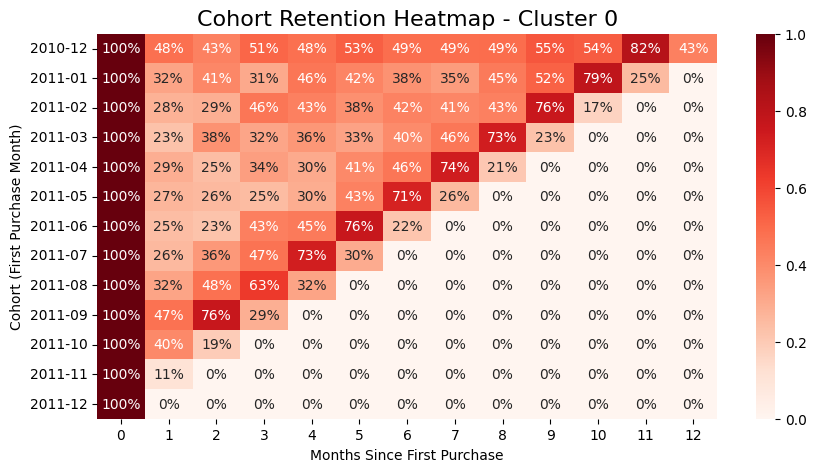

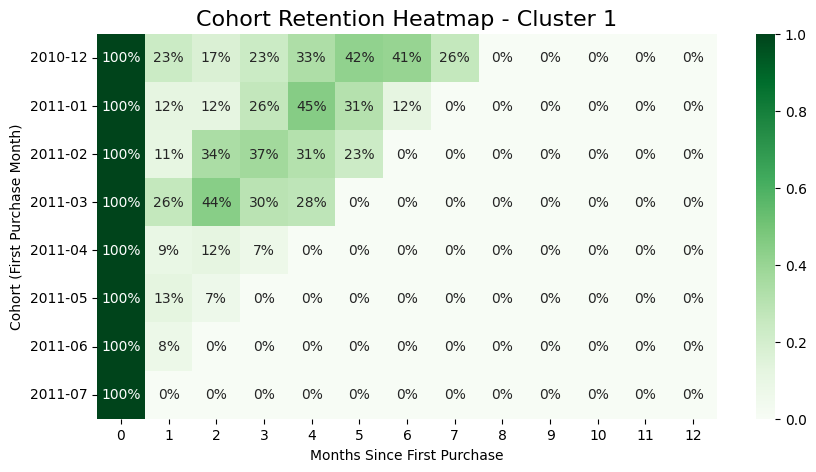

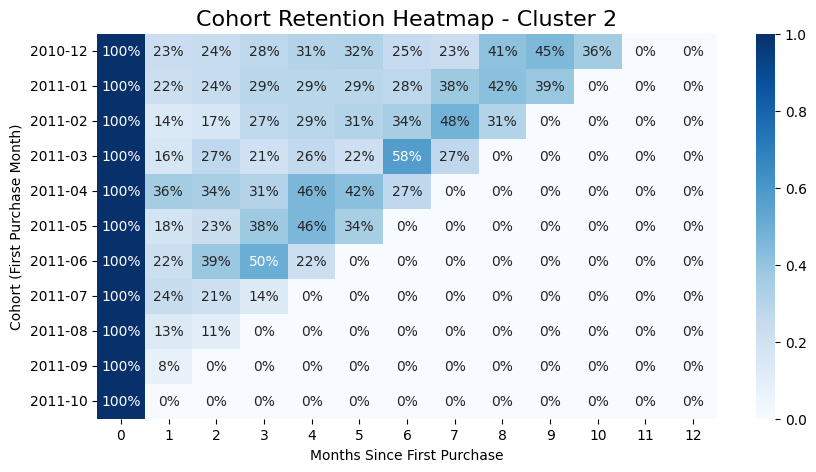

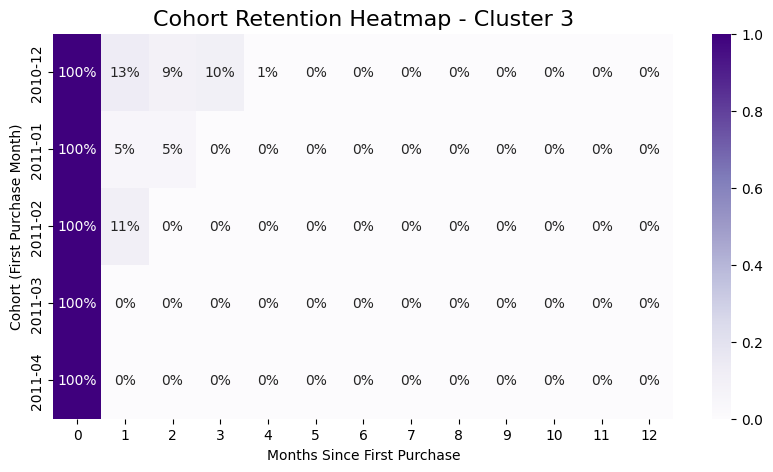

In [ ]:
# Cluster별 Cohort Retention Heatmap (개별 출력)
clusters = sorted(df['Cluster'].unique())
colors = ['Reds', 'Greens', 'Blues', 'Purples']

for i, cluster_id in enumerate(clusters):
    plt.figure(figsize=(10,5))
    cluster_ret = cohort_cluster_retention.loc[cluster_id].fillna(0)

    sns.heatmap(
        cluster_ret,
        annot=True, fmt=".0%", cmap=colors[i],
        vmin=0, vmax=1
    )
    plt.title(f'Cohort Retention Heatmap - Cluster {cluster_id}', fontsize=16)
    plt.ylabel('Cohort (First Purchase Month)')
    plt.xlabel('Months Since First Purchase')
    plt.show()



In [ ]:
# Cluster별 평균 1개월차 Retention 비교 (숫자)

cluster_first_month = cohort_cluster_retention.iloc[:,1].groupby('Cluster').mean()
print("클러스터별 평균 1개월차 잔존율")
print(cluster_first_month.apply(lambda x: f"{x:.1%}"))

클러스터별 평균 1개월차 잔존율
Cluster
0    30.7%
1    14.6%
2    19.7%
3     9.7%
Name: 1, dtype: object


#### · 해석 & 인사이트  

**1. Cohort 테이블 결과 (전체 고객 기준)**  
- 행(CohortMonth): 특정 월에 첫 구매한 고객 집단  
- 열(CohortIndex): 첫 구매 이후 경과 개월 (0=첫 구매월, 1=다음 달, …)  
- 값: 해당 Cohort에서 그 달에도 구매한 고객 수  

**2. 그래프 해석 (전체 고객 기준)**  
- 초기 Cohort(2010-12): 첫 달 885명 → 1개월차 324명(36%) → 이후 수백 명 단위 잔존  
- 2011년 Cohort들: 일부 Cohort는 2~4개월차 반등 (재활성화 패턴)  
- 공통: 첫 달 대비 급격한 이탈 발생, Cohort 간 잔존율 격차 존재  

**3. Cluster별 해석 (세분화 관점)**  
- **Cluster 0 (안정 고객군)**  
  - 초기 Cohort에서 48% 유지 → 이후에도 수백 명 규모 안정적 잔존  
  - 평균 1개월차 잔존율 **30.7%**

- **Cluster 1 (위험 고객군)**  
  - 1개월차부터 10~20% 수준으로 급락, 빠른 이탈 패턴  
  - 평균 1개월차 잔존율 **14.6%**

- **Cluster 2 (성장 가능 고객군)**  
  - 일부 Cohort에서 8개월차 이후 반등 → 재활성화 여지 존재  
  - 평균 1개월차 잔존율 **19.7%**

- **Cluster 3 (휴면 고객군)**  
  - 2010-12 Cohort: 첫 달 162명 → 1개월차 21명(13%) → 5개월차 1명  
  - 평균 1개월차 잔존율 **9.7%**  
  - 2011년 초반 Cohort까지만 등장 후 완전히 소멸 → **신규 유입·장기 유지 모두 불가**


**4. 인사이트 요약**  
- **전체 고객 Cohort 관점**
  - 공통적으로 첫 달 이탈이 가장 심각 → **온보딩 강화 및 초기 재구매 유도** 필요
  - 일부 Cohort에서 2~3개월차 재활성화 패턴 확인 → **캠페인·프로모션 타이밍 전략화 가능**

- **Cluster별 차별화된 유지 전략 필요**
  - **Cluster 0 (안정 고객군)**  
    평균 1개월차 잔존율 30.7%, 장기적 기여 핵심 → **VIP 관리 및 Upselling 강화**
  - **Cluster 1 (위험 고객군)**  
    평균 1개월차 잔존율 14.6%, 빠른 이탈 → **초기 리텐션 방어 및 리마인드 전략 필요**
  - **Cluster 2 (성장 가능 고객군)**  
    평균 1개월차 잔존율 19.7%, 후반 반등 여지 → **재활성화 마케팅 집중**
  - **Cluster 3 (휴면 고객군)**  
    평균 1개월차 잔존율 9.7%, 2011년 이후 Cohort 소멸 → **단기 매출만 기여, 장기 관리 효율화 필요**



## 📌 최종 인사이트 및 전략 도출  

### 1. 종합 인사이트
- **Core Value(Cluster 0)** 에 전체 매출의 80% 이상이 집중 → 소수 의존 구조적 리스크 존재  
- **Growth(Cluster 2)**: 고객 수는 전체 24%에 달하지만 매출 기여는 12% 수준 → 전환 부족  
- **At-Risk(Cluster 1)**: 소규모(약 14%)이나 재활성화 시 가치 상승 여지 존재  
- **Dormant(Cluster 3)**: ROI 낮아 비용 효율적 관리 필요  
- **Cohort 분석 결과**: 첫 달 급격한 이탈, 일부 2~4개월차 재활성화 패턴 확인 → 시기별 맞춤 전략 설계 가능  

### 2. 클러스터 요약

| Cluster | 고객 유형                | NumCustomers | 비중(%) | 매출 기여(%) | 주요 특성              |
|---------|--------------------------|--------------:|--------:|-------------:|------------------------|
| 0       | Core Value (핵심 활동)   |         2,208 |  53.3%  |       80.2%  | 활발 구매·고지출       |
| 1       | At-Risk (이탈 위험)      |           598 |  13.8%  |        4.8%  | 과거 구매, 유지 불안정 |
| 2       | Growth (신규 성장)       |         1,035 |  23.9%  |       11.8%  | 신규 유입, 전환 부족   |
| 3       | Dormant (휴면)           |           497 |  11.5%  |        3.2%  | 장기 미구매, ROI 낮음  |

---

### 3. 클러스터별 전략 제안

#### Cluster 0: Core Value (핵심 활동 고객군)
- **특징**: 최근 활발한 구매 + 고지출, 전체 매출의 80% 기여  
- **전략**
  - VIP 멤버십 & 장기 리워드 제공 → 장기 LTV 방어 및 경쟁사 이탈 예방  
  - 개인화 추천 알고리즘 강화 → 단순 할인보다 구매 경험 최적화로 충성도 제고  
  - 추천 제도(Referral) 운영 → 신규 유입을 Core Value로 전환 가속화  
  - Core Value 고객 행동 패턴(재구매 주기, 리뷰 작성율 등)을 벤치마킹해 Growth·At-Risk 고객에게 확산  
- **기대 효과**
  - 이탈률 10% 감소 시 전체 매출 약 +8% 방어  
  - Referral 기반 신규 유입 + Core Value 확장  
  - Best Practice 확산으로 전체 고객군 전환율 상승  

<br>

#### Cluster 1: At-Risk (이탈 위험 고객군)
- **특징**: 과거 구매 경험은 있으나 유지 불안정, 매출 기여도 5% 미만  
- **전략**
  - 장바구니 리마인드 & 개인화 쿠폰 제공 → 구매 직전 행동 재자극  
  - 일정 기간 구매 공백 시 자동화된 케어 플로우 적용  
    (예: 30일 공백 → 푸시 알림 / 60일 공백 → 할인 쿠폰)  
  - 불만족 리뷰·배송 지연 등 서비스 경험 데이터를 교차 분석 → 단순 혜택 제공이 아니라 **이탈 원인 해결 중심 캠페인** 설계  
- **기대 효과**
  - 재활성화율 34%p 개선 시 매출 약 +23% 보완  
  - 고객 불만 요인 개선 → 장기 리텐션 강화 효과  

<br>

#### Cluster 2: Growth (신규 성장 고객군)
- **특징**: 최근 유입, 고객 수는 전체의 24~25% 수준이나 매출 기여는 12%  
- **전략**
  - 온보딩 프로세스 강화: 첫 30일 내 핵심 행동(재구매·리뷰 작성 등)을 유도 → Core Value 전환율 상승  
  - Cohort 분석 반영: 2~4개월차에 집중 프로모션 투입 → 비용 대비 효율적 재활성화  
  - 구매 패턴 기반 개인화 추천 → 맞춤형 Core Value 유도 경로 설계  
  - Cross-sell/Up-sell → 단순 전환뿐 아니라 객단가(LTV) 자체 상승  
- **기대 효과**
  - 고객 중 5%만 Core Value로 전환해도 전체 매출 +8~10% 성장 가능  
  - 초기 이탈률 완화 + LTV 개선 → 장기적 성장 모멘텀 확보  

<br>

#### Cluster 3: Dormant (휴면 고객군)
- **특징**: 장기 미구매, 매출 기여도 3%, ROI 낮음  
- **전략**
  - 저비용 자동화 캠페인(이메일·푸시)으로 최소한 유지  
  - ROI 낮은 그룹에는 마케팅 비용 최소화 → 자원 효율적 배분  
  - 단, 과거 Core Value 경험 고객은 별도 세그먼트 관리 → 재활성화 시 높은 가치 회수 가능  
- **기대 효과**
  - 마케팅 비용 효율 개선 및 비핵심 고객군 관리 비용 절감  
  - 일부 Dormant 고객의 선택적 재활성화로 추가 매출 회수 가능  
---

### 4. 최종 시사점
- **긍정적 측면**: Core Value 고객군은 안정적인 매출 기반을 제공하며, 이들의 충성도 관리가 전체 성과의 핵심 축이 됨  
- **리스크**: 전체 매출이 소수 고객군(Core Value)에 과도하게 집중 → 구조적 취약성 및 성장 모멘텀 약화 위험  
- **전략적 과제**
  1. **Core Value 방어**: VIP 프로그램·개인화 추천을 통한 리텐션 강화 → 안정적 매출 방어  
  2. **Growth·At-Risk 확대**: Cohort 분석 기반 시기별 프로모션·리마인드 캠페인 → 신규/이탈 위험 고객의 전환 극대화  
  3. **Dormant 효율화**: ROI 기반 선택적 관리 → 불필요한 비용 최소화 + 과거 핵심 고객군은 선별적 재활성화  

➡ 본 분석은 *“Core Value 방어 + Growth·At-Risk 확대를 통한 매출 구조 다변화”*라는 전략 방향성을 제시하며, 이는 초기 문제 정의(소수 VIP 의존 → 매출 구조 불균형)와 직접 연결됨.  

---
### 📌 수치 가정 근거 정리  

- **Core Value (이탈률 10%)**  
  → 주요 핵심 고객군은 이미 충성도가 높아 실제 개선 폭은 제한적임. 따라서 보수적으로 **10% 이탈률 감소**를 가정.  

- **Growth (5% Core Value 전환)**  
  → 신규 고객 전환율은 일반적으로 낮은 편이며, 다양한 CRM/이커머스 사례에서 **3~8% 범위**로 보고됨.  
  따라서 중간값에 해당하는 **5% 전환율**을 가정.  

- **At-Risk (재활성화율 34%p)**  
  → CRM 업계 보고서와 케이스 스터디에서 재활성화 캠페인 효과가 보통 **20~40%** 수준으로 보고됨. 따라서 합리적 범위 내에서 34%p를 가정.

- **Dormant (ROI 기반 관리)**  
  → 장기 미구매 고객군은 고비용 캠페인 대비 효율성이 낮음.  
  따라서 구체적 수치 가정보다는 **저비용 자동화 관리 및 선택적 집중** 전략에 초점을 둠.  



### 📌 프로젝트 한계점 및 아쉬운 점

- **데이터 출처 한계**: 실제 기업 데이터가 아닌 교육용 데이터셋을 기반으로 분석 → 현업 적용 시 시장·고객 맥락 반영 필요  
- **성과 추정치의 가정 의존성**: “이탈률 10% 감소 시 +8% 매출 효과” 등은 추정 계산 결과이며, 실제 매출 효과와는 차이가 있을 수 있음  
- **정성적 요인 미반영**: 고객 경험, 서비스 품질, 마케팅 캠페인 등 정성적 요인이 반영되지 않아 전략 설계의 현실성이 일부 제한됨  
- **실행 검증 부재**: 제안 전략에 대해 A/B 테스트나 파일럿 실행 검증이 진행되지 않아, 실무적 효과성은 추가 실험을 통해 확인이 필요함  
